In [13]:
#말뭉치(코퍼스, corpus) : 텍스트마이닝에 적용되는 텍스트 데이터 집합

#사전 처리

#대소문자 통일

#영문 텍스트 데이터는 대문자 또는 소문자로 변환하는 것이 좋음(보통 소문자로 변경)

s="Hello World"

print(s.lower()) #소문자로 변환

print(s.upper()) #대문자로 변환

hello world
HELLO WORLD


In [14]:
#숫자, 문장부호, 특수문자 제거

# 단어가 아니기 때문에 분석에 불필요한 경우가 대부분임

# 삭제할 경우 분석 결과가 왜곡된다고 생각될 경우 남겨둘 필요도 있음

# 날짜,수치,백분율 등의 숫자는 각각의 문장에서는 의미가 있지만

# 전체 문서 집합에서는 크게 의미가 없는 경우가 많으므로 지우는 것이 일반적

import re

#숫자 제거

p=re.compile("[0-9]+")

result=p.sub("","올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다")

print(result)

올해 들어 서울 지역의 부동산 가격이 % 하락했습니다


In [15]:
# . , ? ! 등의 문장부호들은 삭제하는 것이 일반적

# 각 문장에서는 특수한 역할을 수행할 수 있으나

# 전체 말뭉치의 관점에서는 의미를 부여하기 어려운 경우가 대부분임.
# - ( ) 등의 특수문자도 보통 삭제함

import re

def clean_text(input_data):

    #텍스트에 포함되어 있는 숫자와 특수문자 제거

    p=re.compile("[0-9_!@#$%^&*]")

    result=p.sub("",input_data)

    return result

txt = "올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123"

print(txt)

print(clean_text(txt))

올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123
올해 들어 서울 지역의 부동산 가격이  하락했습니다


In [16]:
#불용어 처리

#불용어 : 빈번하게 사용되지만 구체적인 의미를 찾기 어려운 단어들

#영어의 경우 the, a, an 등의 관사는 많이 사용되지만

#텍스트마이닝에서는 특별한 의미를 부여하기 힘든 경우가 많음

#NLTK : 파이썬에서 많이 사용되는 텍스트마이닝 패키지

# 언어별로 불용어 리스트 제공, 한국어는 지원하지 않음

# 한국어 불용어 리스트를 제공하는 패키지는 아직 없으며

# 직접 만들거나 다른 분석가들이 작성한 리스트를 활용해야 함

words=["추석","연휴","민족","대이동","시작","늘어","교통량","교통사고","특히","자동차", "고장","상당수","나타","것","기자"]

#불용어
stopwords=["가다","늘어","나타","것","기자"]

#불용어 제거

[i for i in words if i not in stopwords]

['추석', '연휴', '민족', '대이동', '시작', '교통량', '교통사고', '특히', '자동차', '고장', '상당수']

In [17]:
#영어 불용어 처리

import nltk

nltk.download("stopwords")

from nltk.corpus import stopwords

words=["chief","justice","roberts",",","president","carter",",","president","clinton","president","bush","obama","fellow","americans","and","people","of","the","world","thank","you"]

[w for w in words if not w in stopwords.words("english")]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['chief',
 'justice',
 'roberts',
 ',',
 'president',
 'carter',
 ',',
 'president',
 'clinton',
 'president',
 'bush',
 'obama',
 'fellow',
 'americans',
 'people',
 'world',
 'thank']

In [18]:
import nltk

nltk.download("punkt") #문장 tokenizer 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#어근 동일화 처리 : 비슷한 어근 처리(stemming)

from nltk.stem.porter import PorterStemmer

from nltk.tokenize import word_tokenize

stm = PorterStemmer()

txt="cook cooker cooking cooks cookery"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

cook cooker cook cook cookeri 

In [20]:
stm=PorterStemmer()

#어근이 동일한 키워드 정리

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

python python python python python 

In [21]:
#LancasterStemmer : PorterStemmer와 비슷하지만 좀더 나은 성능

from nltk.stem.lancaster import LancasterStemmer

stm=LancasterStemmer()

txt="cook cooker cooking cooks cookery"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

cook cook cook cook cookery 

In [22]:
stm=LancasterStemmer()

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

python python python python python 

In [23]:
#Porter나 Lancaster가 처리하지 못하는 경우에는

#RegexpStemmer를 사용하여 특정한 표현식을 일괄적으로 제거함

from nltk.stem.regexp import RegexpStemmer

stm = RegexpStemmer('ing')
print(stm.stem('cooking'))

print(stm.stem('cookery'))

print(stm.stem('ingleside'))

cook
cookery
leside


In [24]:
stm=RegexpStemmer("python")

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

ing s Python ers ed 

In [25]:
# N-gram : n번 연이어 등장하는 단어들의 연쇄

# 2회 바이그램, 3회 트라이그램, 보편적으로 영어에만 적용되며 바이그램이 주로 사용됨

txt = 'Hello'

# 2-gram이므로 문자열의 끝에서 한 글자 앞까지만 반복함

for i in range(len(txt) - 1):            

    # 현재 문자와 그다음 문자 출력

    print(txt[i], txt[i + 1], sep='')   

He
el
ll
lo


In [26]:
txt = 'this is python script'

# 공백을 기준으로 문자열을 분리하여 리스트로 저장

words = txt.split()                

# 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함

for i in range(len(words) - 1):      

    # 현재 문자열과 그다음 문자열 출력
    print(words[i], words[i + 1])    

this is
is python
python script


In [27]:
txt = 'hello'

two_gram = zip(txt, txt[1:])

for i in two_gram:

    print(i[0], i[1], sep='')

he
el
ll
lo


In [28]:
txt = 'this is python script'

words = txt.split()

list(zip(words, words[1:]))

[('this', 'is'), ('is', 'python'), ('python', 'script')]

In [29]:
from nltk import ngrams

sentence="I love you.  Good morning.  Good bye."

grams=ngrams(sentence.split(),2)

for gram in grams:

    print(gram,end=" ")

('I', 'love') ('love', 'you.') ('you.', 'Good') ('Good', 'morning.') ('morning.', 'Good') ('Good', 'bye.') 

In [30]:
sentence="I love you.  Good morning.  Good bye."

grams=ngrams(sentence.split(),3)

for gram in grams:

    print(gram,end=" ")

('I', 'love', 'you.') ('love', 'you.', 'Good') ('you.', 'Good', 'morning.') ('Good', 'morning.', 'Good') ('morning.', 'Good', 'bye.') 

In [31]:
#한국어 처리

#헌법 말뭉치

from konlpy.corpus import kolaw
#말뭉치에 포함된 파일 목록

kolaw.fileids()

['constitution.txt']

In [32]:
#헌법

c = kolaw.open('constitution.txt').read()

print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [33]:
#국회의안 말뭉치

from konlpy.corpus import kobill

kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [34]:
d = kobill.open('1809890.txt').read()

print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [35]:
#품사 분석

# POS 태깅(Part-Of-Speech)

# 모든 언어에 명사,동사,형용사,부사는 공통적으로 존재함

#한나눔 패키지 - KAIST Semantic Web Research Center 개발

#    http://semanticweb.kaist.ac.kr/hannanum/

#pip install konlpy

#pip install tweepy==3.10.0

#pip install jpype1==1.0.2

#jdk8 버전 설치(java 최신버전은 잘 호환되지 않을 수 있음)

from konlpy.tag import Hannanum

han=Hannanum()
txt="""원/달러 환율이 3년 5개월 만에 최고치로 마감하고,

위안화 환율이 11년 만에 달러당 7위안을 넘었다.

원/엔 재정환율 역시 100엔당 30원 가까이 뛰었다."""

#형태소 분석

print(han.morphs(txt))

['원', '/', '달러', '환율', '이', '3년', '5개월', '만', '에', '최고치', '로', '마감', '하고', ',', '위안화', '환율', '이', '11년', '만', '에', '달러당', '7위', '안', '을', '넘', '었다', '.', '원', '/', '엔', '재정환율', '역시', '100엔', '당', '30원', '가까이', '뛰', '었다', '.']


In [36]:
print(han.nouns(txt)) #명사 추출

['원', '달러', '환율', '3년', '5개월', '만', '최고치', '마감', '위안화', '환율', '11년', '만', '달러당', '7위', '원', '엔', '재정환율', '100엔', '30원']


In [37]:
#형태소와 품사

print(han.pos(txt))

[('원', 'N'), ('/', 'S'), ('달러', 'N'), ('환율', 'N'), ('이', 'J'), ('3년', 'N'), ('5개월', 'N'), ('만', 'N'), ('에', 'J'), ('최고치', 'N'), ('로', 'J'), ('마감', 'N'), ('하고', 'J'), (',', 'S'), ('위안화', 'N'), ('환율', 'N'), ('이', 'J'), ('11년', 'N'), ('만', 'N'), ('에', 'J'), ('달러당', 'N'), ('7위', 'N'), ('안', 'X'), ('을', 'J'), ('넘', 'P'), ('었다', 'E'), ('.', 'S'), ('원', 'N'), ('/', 'S'), ('엔', 'N'), ('재정환율', 'N'), ('역시', 'M'), ('100엔', 'N'), ('당', 'X'), ('30원', 'N'), ('가까이', 'M'), ('뛰', 'P'), ('었다', 'E'), ('.', 'S')]


In [38]:
print(han.tagset) #품사 목록

{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사', 'NQ': '고유명사', 'P': '용언', 'PA': '형용사', 'PV': '동사', 'PX': '보조 용언', 'S': '기호', 'X': '접사', 'XP': '접두사', 'XS': '접미사'}


In [39]:
#꼬꼬마 패키지 - 서울대학교 IDS(Intelligent Data Systems) 연구실 개발

#    http://kkma.snu.ac.kr/

from konlpy.tag import Kkma

kkm=Kkma()

print(kkm.morphs(txt)) #형태소 분석

['원', '/', '달러', '환율', '이', '3', '년', '5', '개월', '만', '에', '최고', '치', '로', '마감', '하', '고', ',', '위', '안화', '환율', '이', '11', '년', '만', '에', '달', '러', '당', '7', '위', '안', '을', '넘', '었', '다', '.', '원', '/', '엔', '재정', '환율', '역시', '100', '엔', '당', '30', '원', '가까이', '뛰', '었', '다', '.']


In [40]:
print(kkm.nouns(txt))

['원', '달러', '환율', '3', '3년', '년', '5', '5개월', '개월', '만', '최고', '마감', '위', '위안화', '안화', '11', '11년', '당', '7', '7위안', '안', '엔', '재정', '재정환율', '100', '100엔당', '엔', '30', '30원']


In [41]:
print(kkm.pos(txt))

[('원', 'NNM'), ('/', 'SP'), ('달러', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('3', 'NR'), ('년', 'NNM'), ('5', 'NR'), ('개월', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('최고', 'NNG'), ('치', 'XSN'), ('로', 'JKM'), ('마감', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), (',', 'SP'), ('위', 'NNG'), ('안화', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('11', 'NR'), ('년', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('달', 'VV'), ('러', 'ECD'), ('당', 'NNG'), ('7', 'NR'), ('위', 'NNG'), ('안', 'NNG'), ('을', 'JKO'), ('넘', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('원', 'NNM'), ('/', 'SP'), ('엔', 'NNG'), ('재정', 'NNG'), ('환율', 'NNG'), ('역시', 'MAG'), ('100', 'NR'), ('엔', 'NNM'), ('당', 'NNG'), ('30', 'NR'), ('원', 'NNM'), ('가까이', 'MAG'), ('뛰', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [42]:
print(kkm.tagset) #품사 목록

{'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형 종결 어미', 'EFR': '존칭형 종결 어미', 'EP': '선어말 어미', 'EPH': '존칭 선어말 어미', 'EPP': '공손 선어말 어미', 'EPT': '시제 선어말 어미', 'ET': '전성 어미', 'ETD': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JK': '조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKI': '호격 조사', 'JKM': '부사격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JX': '보조사', 'MA': '부사', 'MAC': '접속 부사', 'MAG': '일반 부사', 'MD': '관형사', 'MDN': '수 관형사', 'MDT': '일반 관형사', 'NN': '명사', 'NNB': '일반 의존 명사', 'NNG': '보통명사', 'NNM': '단위 의존 명사', 'NNP': '고유명사', 'NP': '대명사', 'NR': '수사', 'OH': '한자', 'OL': '외국어', 'ON': '숫자', 'SE': '줄임표', 'SF': '마침표, 물음표, 느낌표', 'SO': '붙임표(물결,숨김,빠짐)', 'SP': '쉼표,가운뎃점,콜론,빗금', 'SS': '따옴표,괄호표,줄표', 'SW': '기타기호 (논리수학기호,화폐기호)', 'UN': '명사추정범주', 'VA': '형용사', 'VC': '지정사', 'VCN': "부정 지정사, 형용사 '아니다'", 'VCP': "긍정 지정사, 서술격 조사 '이다'", 'VV': '동사', 'VX': '보조 용언', '

In [43]:
#트위터 패키지 - 트위터에서 개발, 2017년 이후 오픈코리안텍스트로 이름이 바뀜
#  https://github.com/twitter

from konlpy.tag import Okt

okt=Okt()

print(okt.morphs(txt)) #형태소 분석

['원', '/', '달러', '환율', '이', '3년', '5', '개월', '만에', '최고', '치', '로', '마감', '하고', ',', '\n\n', '위안화', '환율', '이', '11년', '만에', '달러', '당', '7위안', '을', '넘었다', '.', '\n\n', '원', '/', '엔', '재정', '환율', '역시', '100엔', '당', '30원', '가까이', '뛰었다', '.']


In [44]:
print(okt.nouns(txt))

['원', '달러', '환율', '개월', '최고', '치', '마감', '위안화', '환율', '달러', '원', '재정', '환율', '역시', '가까이']


In [45]:
print(okt.pos(txt))

[('원', 'Noun'), ('/', 'Punctuation'), ('달러', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('3년', 'Number'), ('5', 'Number'), ('개월', 'Noun'), ('만에', 'Josa'), ('최고', 'Noun'), ('치', 'Noun'), ('로', 'Josa'), ('마감', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('\n\n', 'Foreign'), ('위안화', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('11년', 'Number'), ('만에', 'Josa'), ('달러', 'Noun'), ('당', 'Suffix'), ('7위안', 'Number'), ('을', 'Foreign'), ('넘었다', 'Verb'), ('.', 'Punctuation'), ('\n\n', 'Foreign'), ('원', 'Noun'), ('/', 'Punctuation'), ('엔', 'Josa'), ('재정', 'Noun'), ('환율', 'Noun'), ('역시', 'Noun'), ('100엔', 'Number'), ('당', 'Foreign'), ('30원', 'Number'), ('가까이', 'Noun'), ('뛰었다', 'Verb'), ('.', 'Punctuation')]


In [46]:
print(okt.tagset)

{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


In [47]:
#어구 추출

print(okt.phrases(txt))

['달러', '달러 환율', '3년', '3년 5개월', '최고치', '마감', '위안화', '위안화 환율', '11년', '달러당', '달러당 7위안', '재정환율', '재정환율 역시', '재정환율 역시 100엔', '30원', '30원 가까이', '환율', '개월', '최고', '7위안', '재정', '역시', '100엔', '가까이']


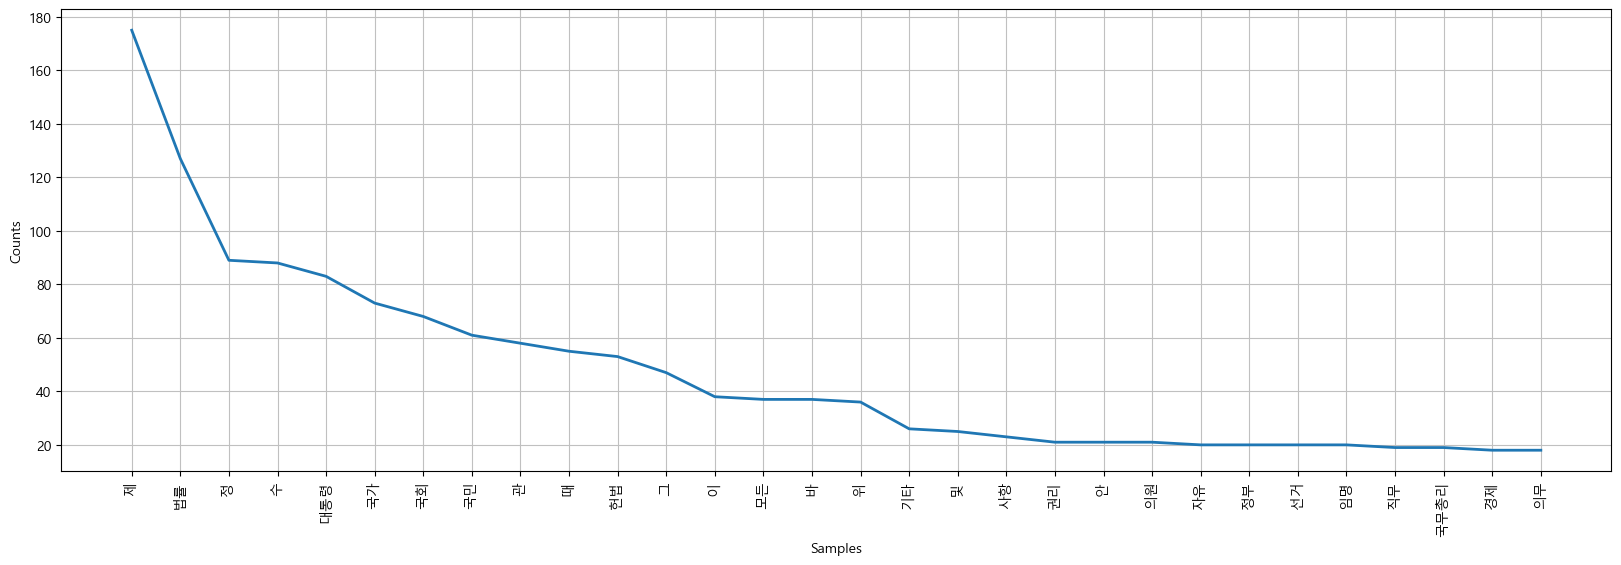

In [48]:
#단어 출현 빈도

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

from nltk import Text

plt.figure(figsize=(20,6))

kolaw = Text(okt.nouns(c), name="kolaw")

kolaw.plot(30)

plt.show()

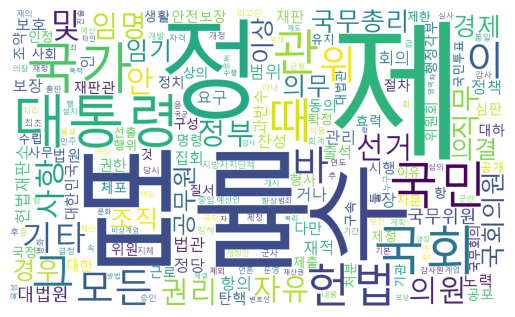

In [49]:
# 에러가 발생할 경우 

# visual studio 재배포 패키지 설치 후 (vc_redist_x64.exe)

# https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

# python 버전에 맞는 whl 파일 다운로드

# 로컬디렉토리에 있는 파일로 설치

# pip install wordcloud-버전-cp39-cp39-win_amd64.whl

from wordcloud import WordCloud

font_path = 'c:/windows/fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)

plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))

plt.axis("off")

plt.show()

In [50]:
#영어 품사 분석

import nltk

nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
from nltk import pos_tag

a="I love you."

tags=pos_tag(a.split())

print(tags)

[('I', 'PRP'), ('love', 'VBP'), ('you.', 'RB')]


<>:20: SyntaxWarning: invalid escape sequence '\W'
<>:20: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_19000\1694507360.py:20: SyntaxWarning: invalid escape sequence '\W'
  tokens=re.split('\W+',html.decode('utf-8'))


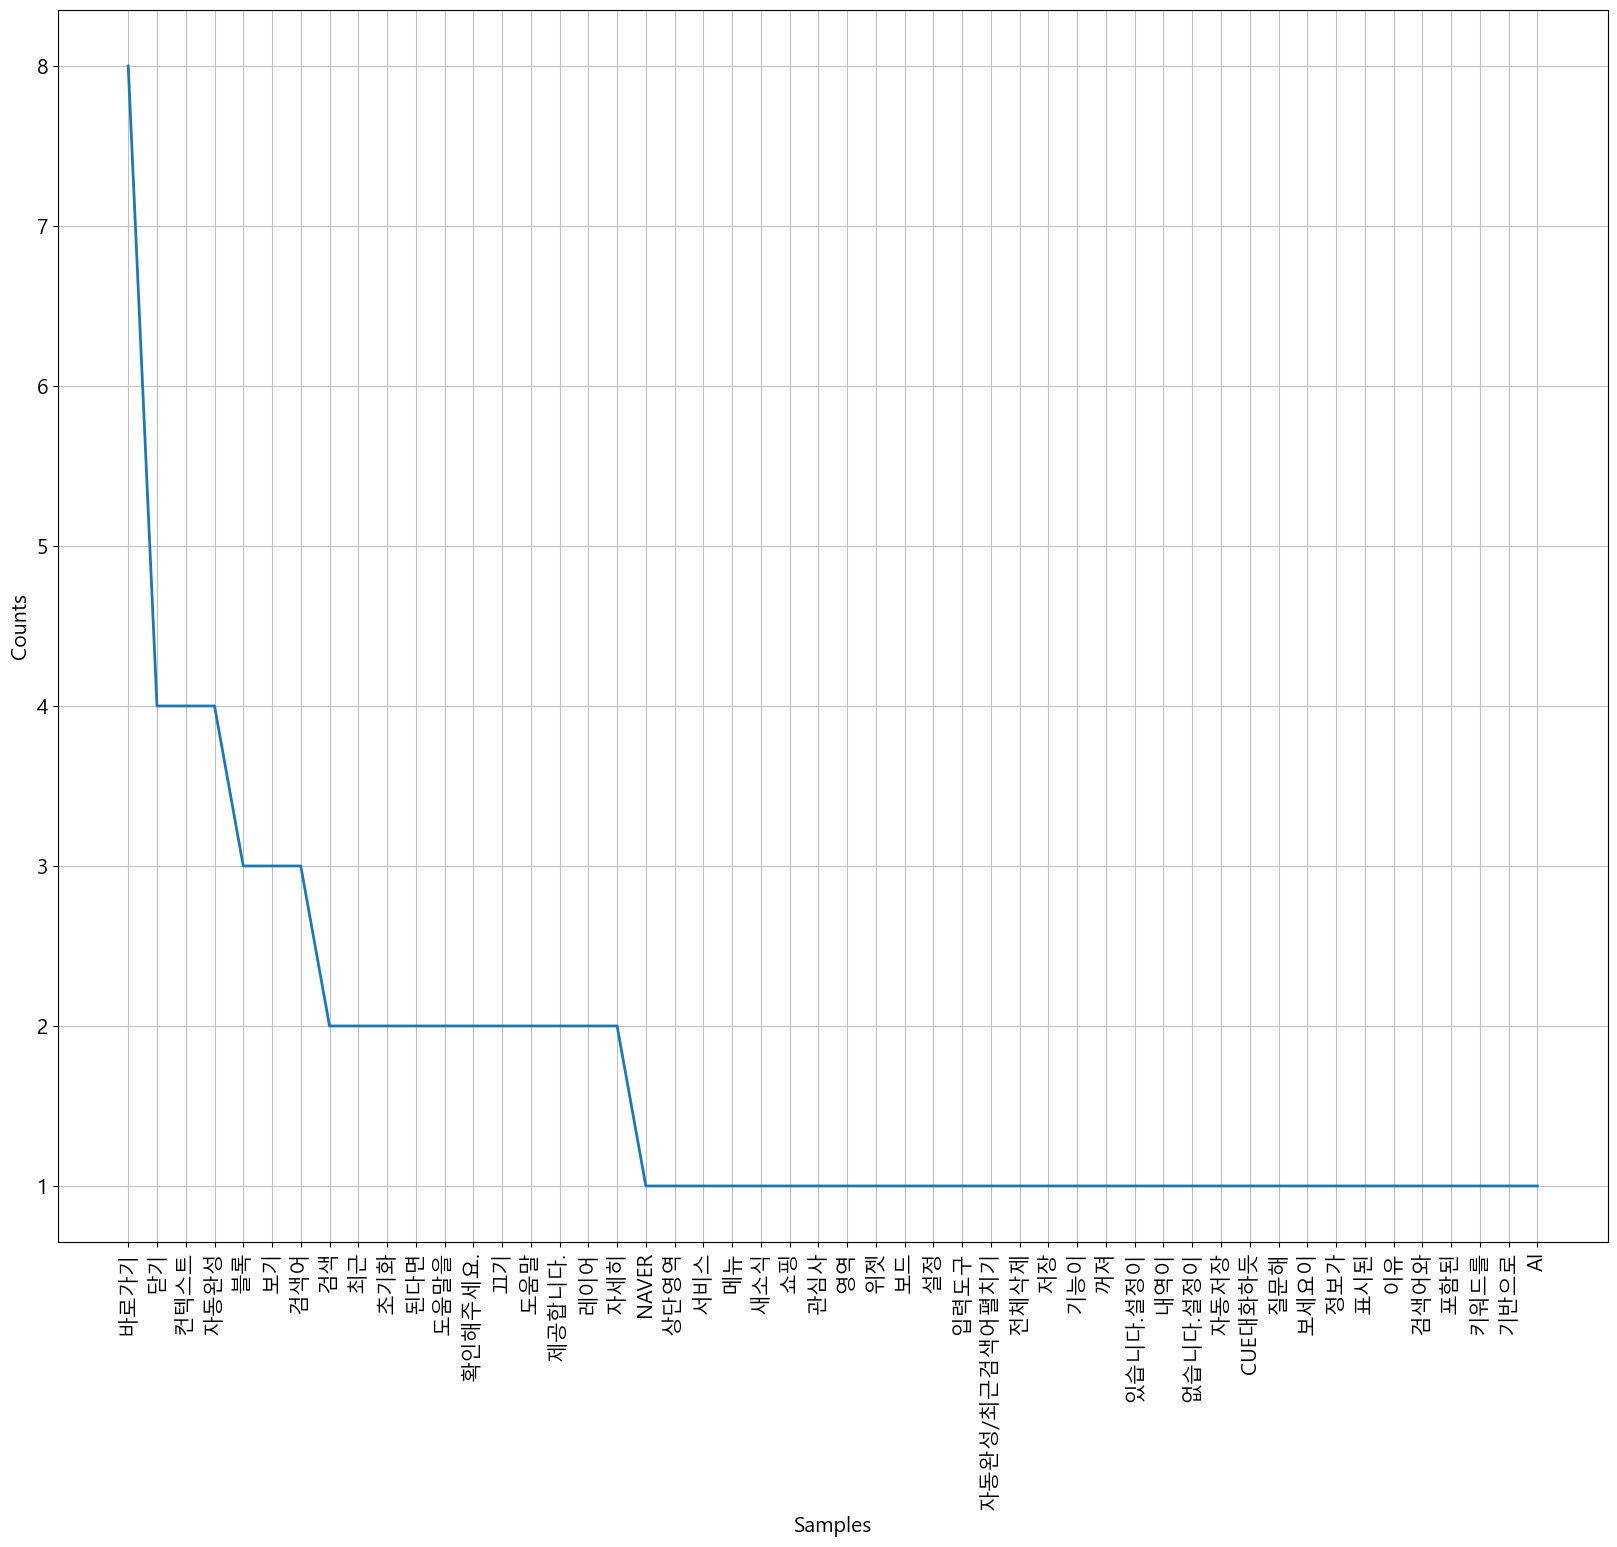

<Axes: xlabel='Samples', ylabel='Counts'>

In [52]:
import urllib
import re

from bs4 import BeautifulSoup

from nltk.corpus import stopwords  

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(20,16)

plt.rcParams["font.size"]=15

res=urllib.request.urlopen('http://naver.com/')

html=res.read()

#알파벳,숫자,_ 문자들만 선택

tokens=re.split('\W+',html.decode('utf-8'))

clean=BeautifulSoup(html,'html.parser').get_text()  

tokens=[token for token in clean.split()]

stop=set(stopwords.words('english'))

clean_tokens= [token for token in tokens

               if len(token.lower())>1 and (token.lower() not in stop)]

tagged=nltk.pos_tag(clean_tokens)

#보통명사, 고유명사만 추출

allnoun=[word for word,pos in tagged if pos in ['NN','NNP']]

freq_result = nltk.FreqDist(allnoun)

freq_result.plot(50, cumulative=False)

In [53]:
#단어빈도분석 : 전체 문서 또는 문서별 단어의 출현 빈도

f = open('c:/data/text/warandpeace.txt',encoding='utf-8')

lines = f.readlines()

f.close()

print(lines[1][:500])


The Project Gutenberg eBook of War and Peace, by Leo Tolstoy



In [54]:
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords

#숫자,특수문자 제거

tokenizer = RegexpTokenizer('[\w]+')

#불용어 사전

stop_words = stopwords.words('english')

#모든 단어를 소문자로 변환

words=''

for line in lines:

    words +=  line.lower()

#print(words)

#단어 단위로 토큰화

tokens = tokenizer.tokenize(words)

#불용어 제거
tokens2 = [i for i in list(tokens) if not i in stop_words]

#글자수 1인 단어들 제거

tokens3= [i for i in tokens2 if len(i)>1]

<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_19000\2259284985.py:7: SyntaxWarning: invalid escape sequence '\w'
  tokenizer = RegexpTokenizer('[\w]+')


In [55]:
import pandas as pd

#출현 빈도가 높은 단어들

pd.Series(tokens3).value_counts().head(10)

said       2842
one        2134
pierre     1963
prince     1929
would      1366
natásha    1213
man        1189
andrew     1144
could      1116
time        929
Name: count, dtype: int64

Counter({'said': 2842, 'one': 2134, 'pierre': 1963, 'prince': 1929, 'would': 1366, 'natásha': 1213, 'man': 1189, 'andrew': 1144, 'could': 1116, 'time': 929, 'princess': 916, 'face': 893, 'french': 881, 'went': 862, 'know': 847, 'old': 835, 'eyes': 827, 'men': 792, 'rostóv': 776, 'room': 771, 'thought': 767, 'go': 755, 'like': 751, 'well': 746, 'see': 734, 'chapter': 732, 'count': 726, 'moscow': 722, 'began': 718, 'come': 684, 'came': 683, 'still': 676, 'without': 675, 'asked': 668, 'mary': 668, 'army': 665, 'looked': 651, 'say': 640, 'first': 633, 'nicholas': 633, 'emperor': 631, 'felt': 631, 'another': 620, 'life': 618, 'away': 617, 'left': 611, 'something': 601, 'two': 595, 'seemed': 583, 'napoleon': 578, 'head': 568, 'day': 567, 'yes': 561, 'people': 560, 'little': 557, 'long': 545, 'hand': 541, 'whole': 532, 'kutúzov': 529, 'back': 520, 'even': 512, 'general': 506, 'heard': 498, 'good': 497, 'way': 494, 'countess': 488, 'must': 482, 'look': 475, 'nothing': 473, 'always': 464, 'saw'

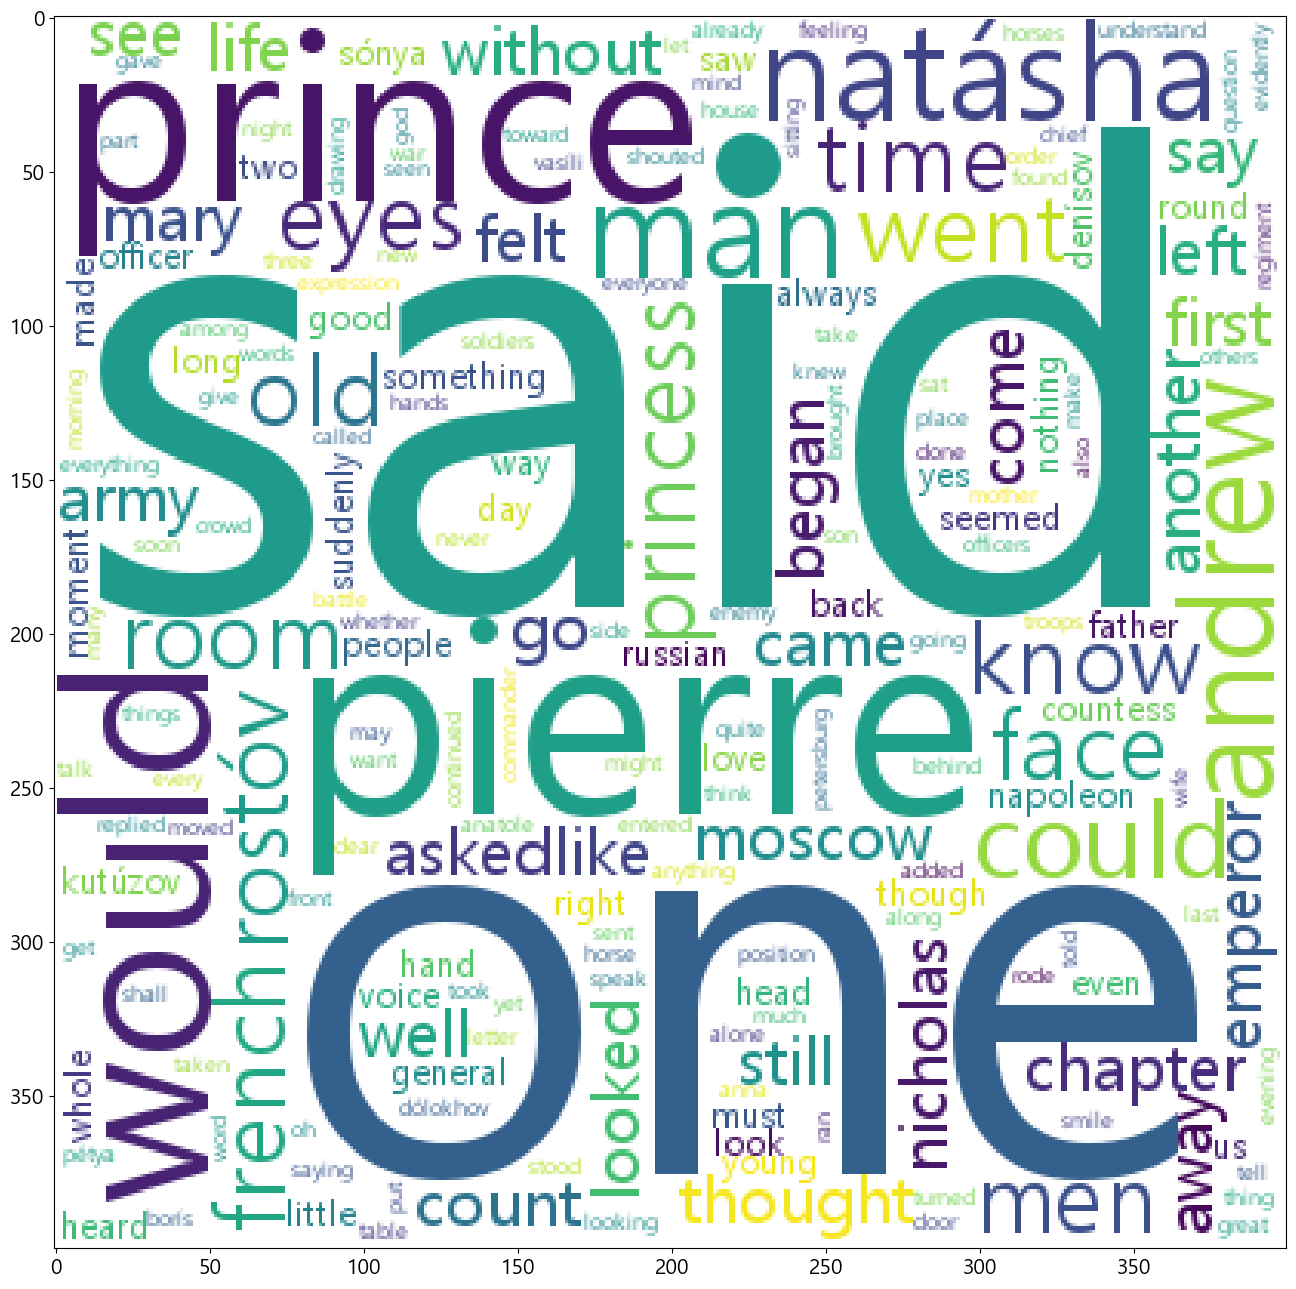

In [56]:
#워드 클라우드

from wordcloud import WordCloud

from collections import Counter

import matplotlib.pyplot as plt

#폰트 경로, 워드클라우드의 가로,세로 사이즈

wordcloud = WordCloud(

    font_path = 'c:/windows/fonts/malgun.ttf',

    width = 400,

    height = 400,

    background_color="white"

)

#단어별 출현횟수 저장

count = Counter(tokens3)

print(count)

wordcloud = wordcloud.generate_from_frequencies(count)

plt.imshow(wordcloud)
plt.show()

In [57]:
#뉴스 기사를 하나 찾아서 news1.txt로 저장

f = open("c:/data/text/news1.txt")

lines = f.readlines()

f.close()

In [58]:
#한나눔 형태소 분석기

from konlpy.tag import Hannanum

han = Hannanum()

temp = []

for i in range(len(lines)):

    #명사만 추출

    a=lines[i].strip()

    temp.append(han.nouns(a))

In [59]:
# 2차원 리스트를 1차원 리스트로 변환하는 함수

def flatten(items):

    flatList = []

    for elem in items:

        if type(elem) == list:

            for e in elem:

                flatList.append(e)

        else:

            flatList.append(elem)
        return flatList

word_list=flatten(temp)

# 두글자 이상인 단어만 추출

word_list=pd.Series([x for x in word_list if len(x)>1])

#단어별 출현 빈도

word_list.value_counts().head(10)

다음      1
경기      1
성남시     1
공원      1
주문      1
'드론'    1
배달      1
서비스     1
시작      1
Name: count, dtype: int64

In [60]:
#불용어 처리

stopwords=['전날','오전']

word_list2=[i for i in word_list if i not in stopwords]

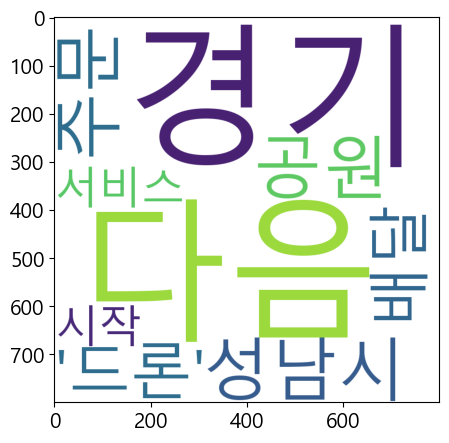

In [61]:
# 한글 뉴스를 워드클라우드로 출력

from collections import Counter

from wordcloud import WordCloud

wordcloud=WordCloud( font_path='c:/windows/fonts/malgun.ttf', width=800,height=800,background_color='white')

import matplotlib.pyplot as plt

count=Counter(word_list2)

wordcloud=wordcloud.generate_from_frequencies(count)

plt.figure(figsize=(5, 5))

plt.imshow(wordcloud)

plt.show()

In [62]:
# 정수인코딩
#텍스트를 숫자로 바꾸는 기법

text = '''모처럼 전국에 비가 내리고 있습니다.

대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.

비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다.

특히 제주와 남해안에서 비바람이 강합니다.

'''

In [63]:
from nltk.tokenize import sent_tokenize

# 문장 토큰화

text = sent_tokenize(text)

print(text)

['모처럼 전국에 비가 내리고 있습니다.', '대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.', '비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다.', '특히 제주와 남해안에서 비바람이 강합니다.']


In [64]:
#명사만 추출하는 방법

from konlpy.tag import Okt

okt=Okt()

text2=[]

for txt in text:

    t=okt.nouns(txt)

    text2.append(t)

    

text2  

[['모처럼', '전국', '비'],
 ['대부분', '밤', '계속', '때문', '종일', '우산'],
 ['비', '양도', '바람', '불기', '때문', '우산', '우산', '게', '더'],
 ['제주', '남해안', '비바람']]

In [65]:
# 명사와 형용사를 추출하는 방법

from konlpy.tag import Okt

okt=Okt()

text2 = []

for txt in text:

    morph = okt.pos(txt)

    text2.append(morph)

text3 = []

for text in text2:

    line=[]

    for word, tag in text:

        if tag in ['Noun','Adjective']:

            line.append(word)

    text3.append(line)

print(text3)

[['모처럼', '전국', '비', '있습니다'], ['대부분', '밤', '계속', '때문', '종일', '우산', '필요하겠는데요'], ['비', '양도', '많고', '바람', '강하게', '불기', '때문', '작은', '우산', '우산', '게', '더', '좋습니다'], ['제주', '남해안', '비바람', '강합니다']]


In [66]:
vocab = {}

sentences = []

stop_words = ['더', '게']

for txt in text3:

    result = []

    for word in txt:

        # 불용어 제거

        if word not in stop_words: #불용어가 아니면

            result.append(word)
            if word not in vocab: #새로운 단어이면

                vocab[word] = 0 # 출현횟수 0으로

            vocab[word] += 1 #출현횟수 증가

    sentences.append(result)

print(sentences)

[['모처럼', '전국', '비', '있습니다'], ['대부분', '밤', '계속', '때문', '종일', '우산', '필요하겠는데요'], ['비', '양도', '많고', '바람', '강하게', '불기', '때문', '작은', '우산', '우산', '좋습니다'], ['제주', '남해안', '비바람', '강합니다']]


In [67]:
#단어:출현빈도

print(vocab)

{'모처럼': 1, '전국': 1, '비': 2, '있습니다': 1, '대부분': 1, '밤': 1, '계속': 1, '때문': 2, '종일': 1, '우산': 3, '필요하겠는데요': 1, '양도': 1, '많고': 1, '바람': 1, '강하게': 1, '불기': 1, '작은': 1, '좋습니다': 1, '제주': 1, '남해안': 1, '비바람': 1, '강합니다': 1}


In [68]:
print(vocab["우산"]) # 단어의 빈도수 출력

3


In [69]:
#단어에 일련번호 부여

word_to_index = {}

i=0

for word in vocab :

    if vocab[word] > 1 : # 빈도수가 1보다 큰 단어들만 추가

        i=i+1

        word_to_index[word] = i #단어에 번호를 매김

print(word_to_index)

{'비': 1, '때문': 2, '우산': 3}


In [70]:
#Out-Of-Vocabulary 단어 집합에 없는 단어

#출현빈도수가 낮은 단어들은 word_to_index에 없으므로

# word_to_index에 OOV라는 단어를 추가하고 단어 집합에 없는 단어들은 OOV로 처리

word_to_index['OOV'] = len(word_to_index) + 1

encoded = []
for s in sentences: #문장들을 반복

    temp = []

    for w in s: #문장의 단어들을 반복

        try:

            #단어의 고유번호를 리스트에 추가

            temp.append(word_to_index[w])

        except:

            #존재하지 않는 단어는 OOV의 인덱스를 추가

            temp.append(word_to_index['OOV'])

    encoded.append(temp)

print(encoded)

[[4, 4, 1, 4], [4, 4, 4, 2, 4, 3, 4], [1, 4, 4, 4, 4, 4, 2, 4, 3, 3, 4], [4, 4, 4, 4]]


In [71]:
import numpy as np

#2차원 데이터를 1차원으로 바꾸고

words = np.hstack(sentences)

print(words)

['모처럼' '전국' '비' '있습니다' '대부분' '밤' '계속' '때문' '종일' '우산' '필요하겠는데요' '비' '양도'
 '많고' '바람' '강하게' '불기' '때문' '작은' '우산' '우산' '좋습니다' '제주' '남해안' '비바람' '강합니다']


In [72]:
from collections import Counter

vocab = Counter(words) # 단어의 출현빈도를 쉽게 계산하는 클래스

print(vocab)

Counter({'우산': 3, '비': 2, '때문': 2, '모처럼': 1, '전국': 1, '있습니다': 1, '대부분': 1, '밤': 1, '계속': 1, '종일': 1, '필요하겠는데요': 1, '양도': 1, '많고': 1, '바람': 1, '강하게': 1, '불기': 1, '작은': 1, '좋습니다': 1, '제주': 1, '남해안': 1, '비바람': 1, '강합니다': 1})


In [73]:
print(vocab["우산"]) # 단어의 빈도수

3


In [74]:
vocab_size = 5

# 출현빈도가 높은 상위 5개의 단어

vocab = vocab.most_common(vocab_size)
vocab

[('우산', 3), ('비', 2), ('때문', 2), ('모처럼', 1), ('전국', 1)]

In [75]:
word_to_index = {}

i = 0

for (word, frequency) in vocab :

    i = i+1

    word_to_index[word] = i

print(word_to_index)

{'우산': 1, '비': 2, '때문': 3, '모처럼': 4, '전국': 5}


In [76]:
#원핫인코딩

#정수인코딩의 단점: 단어의 순서가 없음

#원핫인코딩 : 단어의 순서에 맞게 배열

from konlpy.tag import Okt  

okt=Okt()  

#토근화(형태소 분석)

token=okt.morphs("나는 학교에 간다 나는 집에 간다")  

print(token)

['나', '는', '학교', '에', '간다', '나', '는', '집', '에', '간다']


In [77]:
#중복된 단어는 제외하고 단어를 key로 고유한 숫자 인덱스 부여

word2index={}

for idx,voca in enumerate(token):

    if voca not in word2index.keys():

        word2index[voca]=len(word2index)

print(word2index)

{'나': 0, '는': 1, '학교': 2, '에': 3, '간다': 4, '집': 5}


In [78]:
#원핫인코딩 함수

def one_hot_encoding(word, word2index):

    #전체 단어 갯수만큼 0으로 채운 리스트

    one_hot_vector = [0]*(len(word2index))

    #해당하는 단어의 인덱스를 찾아서

    index=word2index[word]

    #1로 설정(나머지는 0)

    one_hot_vector[index]=1
    return one_hot_vector

key_list=word2index.keys()

print(key_list)

for key in key_list:

    print(key, one_hot_encoding(key,word2index))

dict_keys(['나', '는', '학교', '에', '간다', '집'])
나 [1, 0, 0, 0, 0, 0]
는 [0, 1, 0, 0, 0, 0]
학교 [0, 0, 1, 0, 0, 0]
에 [0, 0, 0, 1, 0, 0]
간다 [0, 0, 0, 0, 1, 0]
집 [0, 0, 0, 0, 0, 1]


In [79]:
#keras에서 지원하는 원핫인코딩 함수

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.utils import to_categorical

text="나는 학교에 간다 나는 집에 간다"

t = Tokenizer()

# 각 단어에 대한 정수 인코딩

t.fit_on_texts([text])

print(t.word_index)

#각 단어에 매핑된 숫자로 변환된 리스트

sub_text="나는 집에 간다"

encoded=t.texts_to_sequences([sub_text])[0]

print(encoded)

#원핫인코딩

one_hot = to_categorical(encoded)

print(one_hot)

{'나는': 1, '간다': 2, '학교에': 3, '집에': 4}
[1, 4, 2]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


In [80]:
#원핫인코딩의 단점:

# 단어 개수가 많아지면 변수의 개수가 많아지게 됨
# 메모리 활용의 비효율성: 변수가 100개 있다면 99개의 0과 1개의 0으로 구성됨
# 비슷한 단어들의 유사성을 표현하기 어려움
#   강아지 [0,1,1]와 개 [1,0,0] 이라면 비슷한 단어이지만 유사성을 찾기 어려움
# 유사성을 찾기 위한 방법으로 LSA, RNN, Word2Vec 등의 방법이 있음

In [81]:
# TF-IDF
docs = [

  'python 데이터 python 프로그래밍',

  '데이터 분석',

  '빅 데이터 분석',

  '데이터 전처리 텍스트 전처리'

]

vocab=list() #단어사전 리스트

for doc in docs: #문서

    for w in doc.split(): #단어

        vocab.append(w) #단어 추가

        

vocab=list(set(vocab)) #중복 단어를 제거한 리스트

vocab.sort() #오름차순 정렬

vocab

['python', '데이터', '분석', '빅', '전처리', '텍스트', '프로그래밍']

In [82]:
from math import log

N = len(docs) # 총 문서의 수

# tf(Term Frequency) : 단어의 빈도
# 특정 문서 d에서 특정 단어 t의 출현빈도

def tf(t, d):

    return d.count(t)
# df(Document Frequency) : 특정 단어가 등장한 문서의 수, 모든 문서에 자주 나오는 단어는 중요한 단어가 아닐 수 있음
#   논문에서 abstract, 서론, 본론, 결론, 참고문헌 항상 나오는 단어들 - 중요한 의미가 없음
# idf(Inverse Document Frequency) : df의 반비례하는 수
#   log( n / (1+df(t)))
#   희귀 단어의 경우 분모가 매우 작아지게 되어 idf 값이 너무 커지게 되므로 로그를 취함
#   한번도 등장하지 않는 단어라면 분모가 0이 되므로 1을 더하게 됨

def idf(t):

    df = 0

    for doc in docs:

        df += t in doc

    return log(N/(df + 1))

#tf와 idf를 곱한 값

def tfidf(t, d):

    return tf(t,d)* idf(t)

In [83]:
import pandas as pd

result = []

for i in range(N): #문서 반복

    result.append([])

    d = docs[i]
    for j in range(len(vocab)): #단어 반복

        t = vocab[j]

        #1차원 배열의 끝에 추가

        result[-1].append(tf(t, d))

print(result)  

[[2, 1, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0], [0, 1, 0, 0, 2, 1, 0]]


In [84]:
df_tf = pd.DataFrame(result, columns = vocab)

df_tf

,python,데이터,분석,빅,전처리,텍스트,프로그래밍
0,2,1,0,0,0,0,1
1,0,1,1,0,0,0,0
2,0,1,1,1,0,0,0
3,0,1,0,0,2,1,0


In [85]:
#각 단어의 idf 계산

result = []

for j in range(len(vocab)):

    t = vocab[j]

    result.append(idf(t))

df_idf = pd.DataFrame(result, index = vocab, columns = ["IDF"])

df_idf

,IDF
python,0.693147
데이터,-0.223144
분석,0.287682
빅,0.693147
전처리,0.693147
텍스트,0.693147
프로그래밍,0.693147


In [86]:
#모든 단어들의 tfidf 계산 - tfidf가 크면 중요도가 높고, 작으면 중요도가 낮음

result = []

for i in range(N):

    result.append([])

    d = docs[i]

    for j in range(len(vocab)):

        t = vocab[j]
        result[-1].append(tfidf(t,d))

df_tfidf = pd.DataFrame(result, columns = vocab)

df_tfidf

,python,데이터,분석,빅,전처리,텍스트,프로그래밍
0,1.386294,-0.223144,0.000000,0.000000,0.000000,0.000000,0.693147
1,0.000000,-0.223144,0.287682,0.000000,0.000000,0.000000,0.000000
2,0.000000,-0.223144,0.287682,0.693147,0.000000,0.000000,0.000000
3,0.000000,-0.223144,0.000000,0.000000,1.386294,0.693147,0.000000


In [87]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [

    'you know I want your love',

    'I like you',

    'what should I do ',    

]

#DTM(Document Term Matrix, 문서 단어 행렬)

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산

print(vector.fit_transform(corpus).toarray())

print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corpus)

print(tfidfv.transform(corpus).toarray())

print(tfidfv.vocabulary_)

#사이킷런의 TF-IDF 계산 방식이 약간 달라서 차이가 나지만 일반적으로 많이 사용하는 함수

#  tf-idf에 L2 정규화(가중치를 제곱한 값을 더하는 방식)를 적용하여 값을 조정함

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [89]:
# KMeans
from konlpy.tag import Hannanum

import pandas as pd

han = Hannanum()

df = pd.read_csv('c:/data/text/군집분석데이터.csv',encoding="ms949")

df

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
5,라돈,"최근 침대 매트리스에 이어 온수매트에서도 라돈이 검출됐다는 소식이 알려지면서, 가정..."
6,라돈,"침대, 생리대, 마스크 등에서 라돈이 검출되면서, 발암 물질 ‘라돈’에 대한 관심..."
7,라돈,하이젠 온수매트가 '라돈 온수매트'로 언급되고 있다.\n\n최근 한 온라인커뮤니티에...
8,라돈,겨울 난방 제품인 온수매트에서 라돈이 검출된 가운데 해당 업체가 별 문제가 되지 않...
9,라돈,"매트리스, 생리대에 이어 온수 매트에서도 라돈이 검출돼 이슈로 떠올랐다.\n\n5일..."


In [90]:
docs = []

for i in df['기사내용']:

    #명사만 추출

    docs.append(han.nouns(i))

for i in range(len(docs)):

    #명사들 사이에 공백을 붙여서 열거

    docs[i] = ' '.join(docs[i])

print(docs[0])

유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성


In [91]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# BOW (Bag of Words)를 이용한 문서-단어 행렬 생성

#문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어서 인코딩한 벡터를 생성(행은 문서번호, 컬럼은 각 단어)

vec = CountVectorizer()
#vec = TfidfVectorizer()

X = vec.fit_transform(docs)

df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

df2.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
from sklearn.cluster import KMeans

#군집수를 3으로 설정

kmeans = KMeans(n_clusters=3,random_state=10).fit(df2)

print(kmeans.labels_)

[1 1 1 1 1 1 1 2 2 2 0 0 0 0 0]


          component 1  component 2
검색어                               
유한양행        -2.245408    -4.167447
유한양행        -3.613940    -9.898629
유한양행        -2.932638    -7.159346
유한양행        -2.142776    -3.757097
유한양행        -3.397887    -8.904249
라돈          -3.456162     0.931168
라돈          -4.172638     2.527021
라돈          -6.418891     7.240856
라돈          -7.928541    10.011257
라돈          -7.161775     8.881843
복면가왕 왕밤빵    20.296606     4.548939
복면가왕 왕밤빵     4.186122    -0.501075
복면가왕 왕밤빵     9.931536     1.068590
복면가왕 왕밤빵     6.580160    -0.003793
복면가왕 왕밤빵     2.476233    -0.818038


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


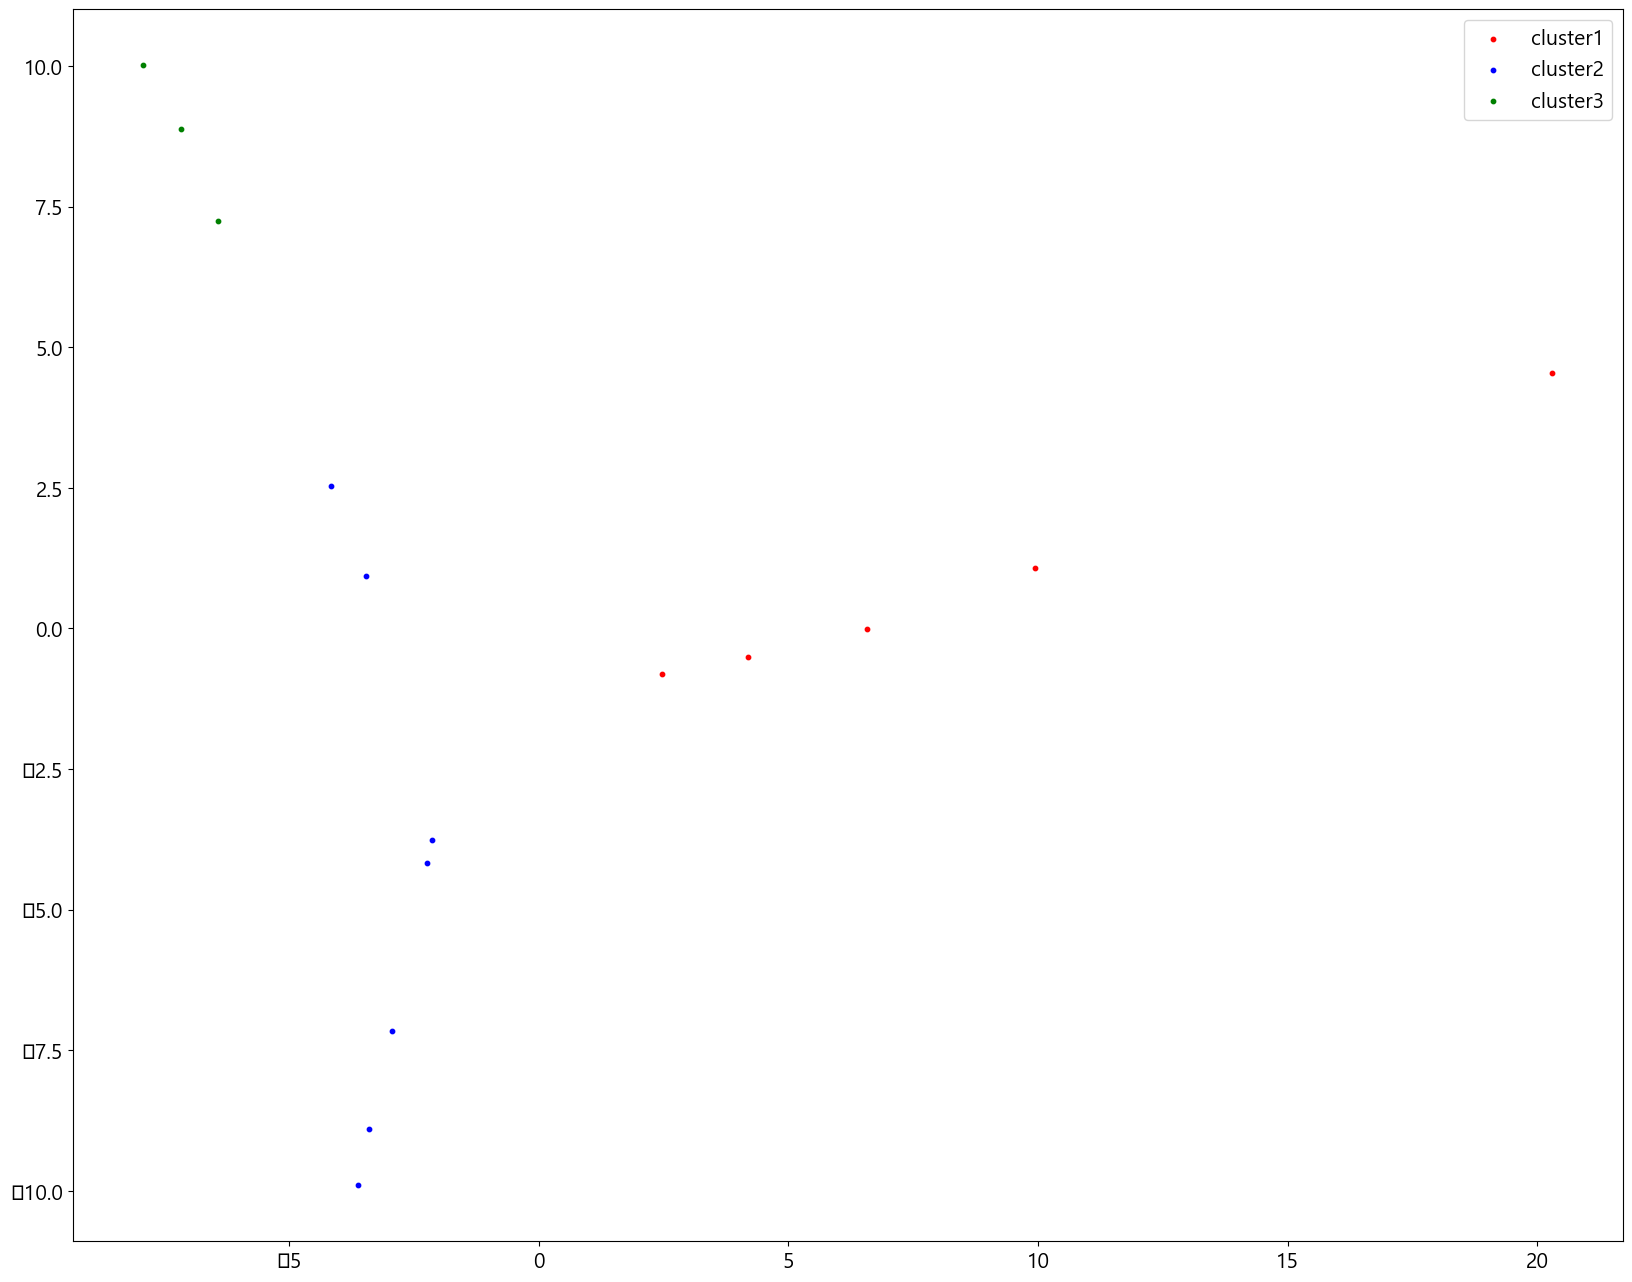

In [93]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

#플로팅을 위하여 ca 기법(주성분분석)으로 차원을 2차원으로 축소

pca = PCA(n_components=2,random_state=10)

components = pca.fit_transform(df2)

df3 = pd.DataFrame(data = components, columns = ['component 1', 'component 2'])

df3.index=df['검색어']

print(df3)

kmeans.labels_ == 0

# x축 : first, y축 : second 번호로 나타낸 후 시각화

plt.scatter(df3.iloc[kmeans.labels_ == 0, 0],

            df3.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red',  label = 'cluster1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0],

            df3.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')

plt.scatter(df3.iloc[kmeans.labels_ == 2, 0],

            df3.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')

plt.legend()

In [94]:
# KMeans - 뉴스분석

#한글 뉴스 데이터 분석

#출처 : https://teddylee777.github.io/machine-learning/sklearn-kmeans-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81

import pandas as pd

df = pd.read_csv('c:/data/news/news.csv')

df.head()

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count
0,1,“2028학년도에 수시·정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부...,2019-02-15 02:42:56.000000,0,4,https://pds.joins.com/news/component/htmlphoto...,"대입,교수,수능,시기,학년도",0,0,0,0,“수시·정시 통합해야” vs “수능 무력화 의도”…2028 대입 두고 논란,2019-02-16 17:50:04.872868,https://news.joins.com/article/23373597,0
1,1,최근 열린 삼보국가대표 선발전에서 1위를 한 뒤. 신재용 씨 제공\n\n고교 국가대...,2019-02-16 05:00:00.000000,1,5,http://dimg.donga.com/a/600/0/90/5/wps/NEWS/IM...,"공부,운동,유도,때,대회",0,-2,0,0,“공부하겠다는 내게 감독님이 열쇠 주셔” 서울대 가서도 유도-삼보로 꿈 키워 [양종...,2019-02-16 17:50:05.303722,http://news.donga.com/3/all/20190216/94152869/1,1
2,1,/첨부용/연세대 수험생 대나무숲\n\n우체국 전산 오류로 등록금을 못 내 연세대 합...,2019-02-13 15:00:00.000000,0,6,http://image.chosun.com/sitedata/image/201902/...,"수험,우체국,등록금,글,해당",0,0,0,0,"""등록금 전산 오류로 연대 합격 취소"" 책임 갑론을박",2019-02-16 17:50:05.412111,http://news.chosun.com/site/data/html_dir/2019...,0
3,1,"교육당국, 갑자기 통과 기준 점수 대폭 올려… 폐지 논란 재점화\n\n자사고聯, 교...",2019-02-15 15:00:00.000000,0,7,http://image.chosun.com/sitedata/image/201902/...,"자사고,평가,기준,지표,교육부",2,4,0,0,"""또 자사고 죽이기냐"" 再지정 문턱 높이자 폭발한 학교들",2019-02-16 17:50:05.495572,http://news.chosun.com/site/data/html_dir/2019...,2
4,1,[베리타스알파=권수진 기자] 14일 오후9시 마감한 상위9개대학(고려대 동국대 서강...,2019-02-15 07:37:32.000000,0,8,http://cds.veritas-a.com/news/photo/201902/144...,"충원,모집,추합,과,교육",0,0,0,0,[2019정시충원율] 상위9개대학 57.9%.. ‘상승’.. 추합 4159명,2019-02-16 17:50:06.153964,http://www.veritas-a.com/news/articleView.html...,0


In [95]:
#클래스별 샘플 갯수

df["category"].value_counts()

category
2    4682
1    2872
3    2121
Name: count, dtype: int64

In [96]:
import re

# ^[  ] start, [^ ] not , 한글/영문자만 허용

def preprocessing(sentence):

    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)

    return sentence

#content 필드에 preprocessing 함수 적용

df['content_cleaned'] = df['content'].apply(preprocessing)

content = df['content_cleaned'].tolist()

content[0]

'     학년도에 수시 정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부종합전형 학종      로 만들겠다는 꼼수다  학종에 대한 불신이 큰 현실을 외면한 채 혼란을 키우고 있는 김경범 서울대 교수를 국가교육회의에서 내보내야 한다  공정사회를위한국민모임 공정사회 은   일 오전   시 정부서울청사에서 기자회견 열고 국가교육회의 위원인 김경범 서울대 서어서문학과 교수의 사퇴를 촉구했다  김 교수가 학종을 옹호하고 있어 공정한 대입제도 개편에 걸림돌이 된다는 주장이다 이처럼     학년도 대입제도를 둘러싼 논란이 확산하고 있다  전날 청주 오송에서 열린 고교학점제 연구학교 교원연수 행사에서 김 교수가 미래 대입 전형을 주제로 발표한 게 불씨가 됐다  김 교수는 국가교육회의  기에서 고등교육전문위원회 위원으로 참여하고 있다 김 교수는 자료집에서  수시와 정시를   월로 통합해 수능 성적과 학생부 면접을 한꺼번에 평가하자 고 제안했다  또 수능 전 과목을 절대평가하고  EBS 연계도 폐지해야 한다고 주장했다      학년도 고교학점제에 따라     학년도 대입을 개편해야 한다면서 이같이 밝힌 것이다 현행 대입은 수시와 정시로 시기가 구분돼 있어 수시는  월  정시는   월 말에 원서를 접수한다  수시 준비하느라 고   학기 때 학교 수업이 제대로 이뤄지지 않는다는 비판은 꾸준히 제기돼 왔다  김 교수의 주장에 따르면 선발 시기를 통합하면 고  교실도 정상화하고 학생 학부모 교사의 부담도 줄일 수 있다는 것이다 이에 대해 대학 관계자와 교사 학부모는 엇갈린 의견을 내놨다  고교 교사는 환영했지만  대학 입학관계자와 학부모는 부정적이었다  서울 일반고의 한 교사는  대입 전형 시기가 나뉘어 있어 교사와 학생 학부모의 부담이 크고  고   학기 수업이 파행된 것은 맞다 며  이번에 나온 방안은 아니더라도 어떤 식으로든 변화가 필요하다 고 말했다 반면 서울 사립대의 한 입학처장은  고교별 수준이 제각각인 상황에서 수능까지 절대평가로 바뀌면 변별력이 크게 약화할 

In [97]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 인코딩한 벡터를 생성

vectorizer = CountVectorizer(max_features=1000) #단어수 제한

#vectorizer = TfidfVectorizer(max_features=1000) #단어수 제한

X = vectorizer.fit_transform(content)

X.shape

(9675, 1000)

In [98]:
from sklearn.preprocessing import normalize

# l2 정규화

# 정규화 - 과적합을 방지하기 위한 기법, 오차에 대한 패널티, l1 정규화 - 가중치의 절대값을 더하는 방식, l2 정규화 - 가중치를 제곱한 값을 더하는 방식

# TfidfVectorizer의 경우 생략 - tf * idf => l2 정규화 => tfidf 벡터 생성 

X = normalize(X)

X[0].toarray()

array([[0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.07930516, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07930516, 0.        ,
        0.        , 0.23791548, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [99]:
from sklearn.cluster import KMeans

# k-means 알고리즘 적용

kmeans = KMeans(n_clusters=3,random_state=10).fit(X)

# labels에 merge

#df['labels'] = kmeans.labels_

print(kmeans.labels_)

print(pd.DataFrame(kmeans.labels_).value_counts())

[2 2 2 ... 1 1 1]
0
1    4799
2    3760
0    1116
Name: count, dtype: int64


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


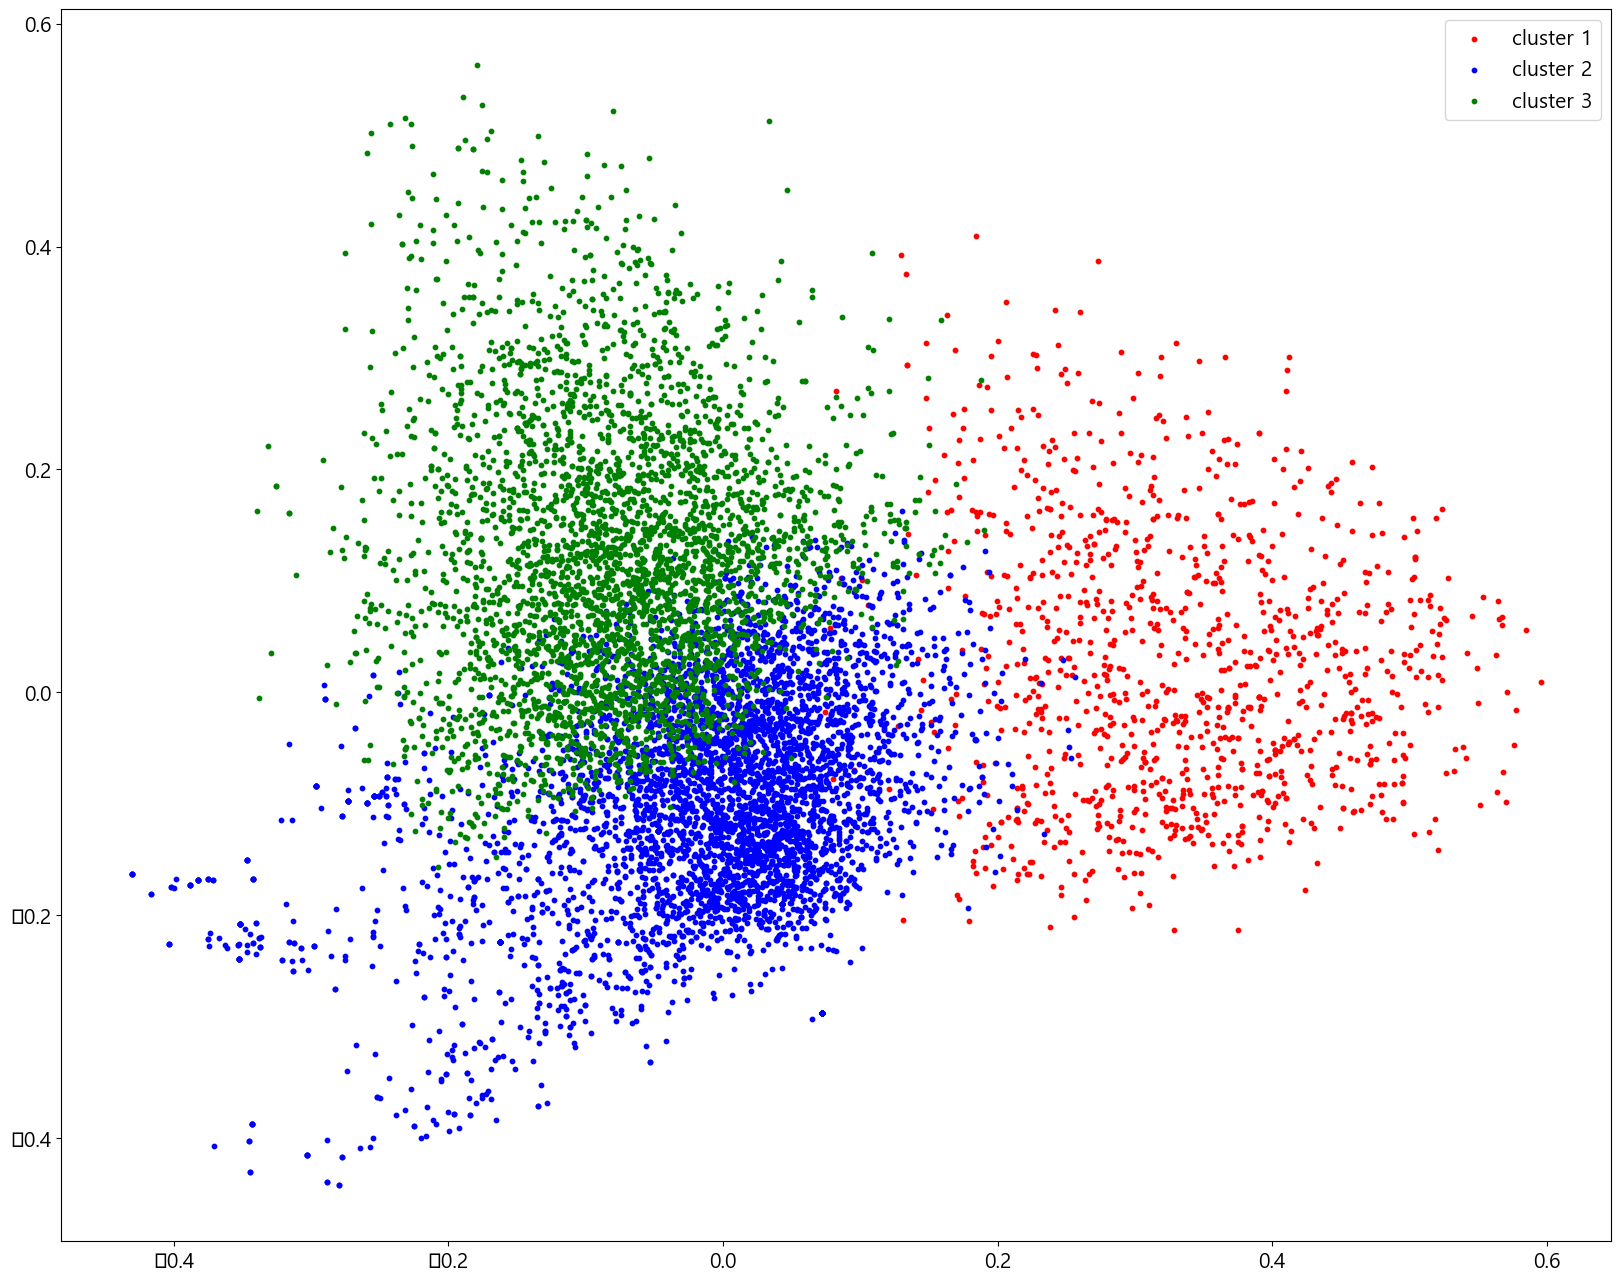

In [100]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
#그래프 출력을 위해 주성분 분석

pca=PCA(n_components=2, random_state=10)

components=pca.fit_transform(X.toarray())

df3=pd.DataFrame(data=components, columns=['component 1','component 2'])

df3.index=df['category']

plt.scatter(df3.iloc[kmeans.labels_ == 0, 0], df3.iloc[kmeans.labels_ == 0, 1], s=10, c='r', label='cluster 1')

plt.scatter(df3.iloc[kmeans.labels_ == 1, 0], df3.iloc[kmeans.labels_ == 1, 1], s=10, c='b', label='cluster 2')

plt.scatter(df3.iloc[kmeans.labels_ == 2, 0], df3.iloc[kmeans.labels_ == 2, 1], s=10, c='g', label='cluster 3')

plt.legend()

plt.show()

In [114]:
#스팸메일 분류

import pandas as pd

df = pd.read_csv('c:/data/spam/spam.csv',encoding='latin1')

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [115]:
# ham => 0, spam => 1 로 바꾸어 저장

df['v1'] = df['v1'].replace(['ham','spam'],[0,1])

df[:5]



C:\Users\user\AppData\Local\Temp\ipykernel_19000\1580675571.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['v1'] = df['v1'].replace(['ham','spam'],[0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
df.shape

(5572, 2)

v1
0    4825
1     747
Name: count, dtype: int64


<Axes: xlabel='v1'>

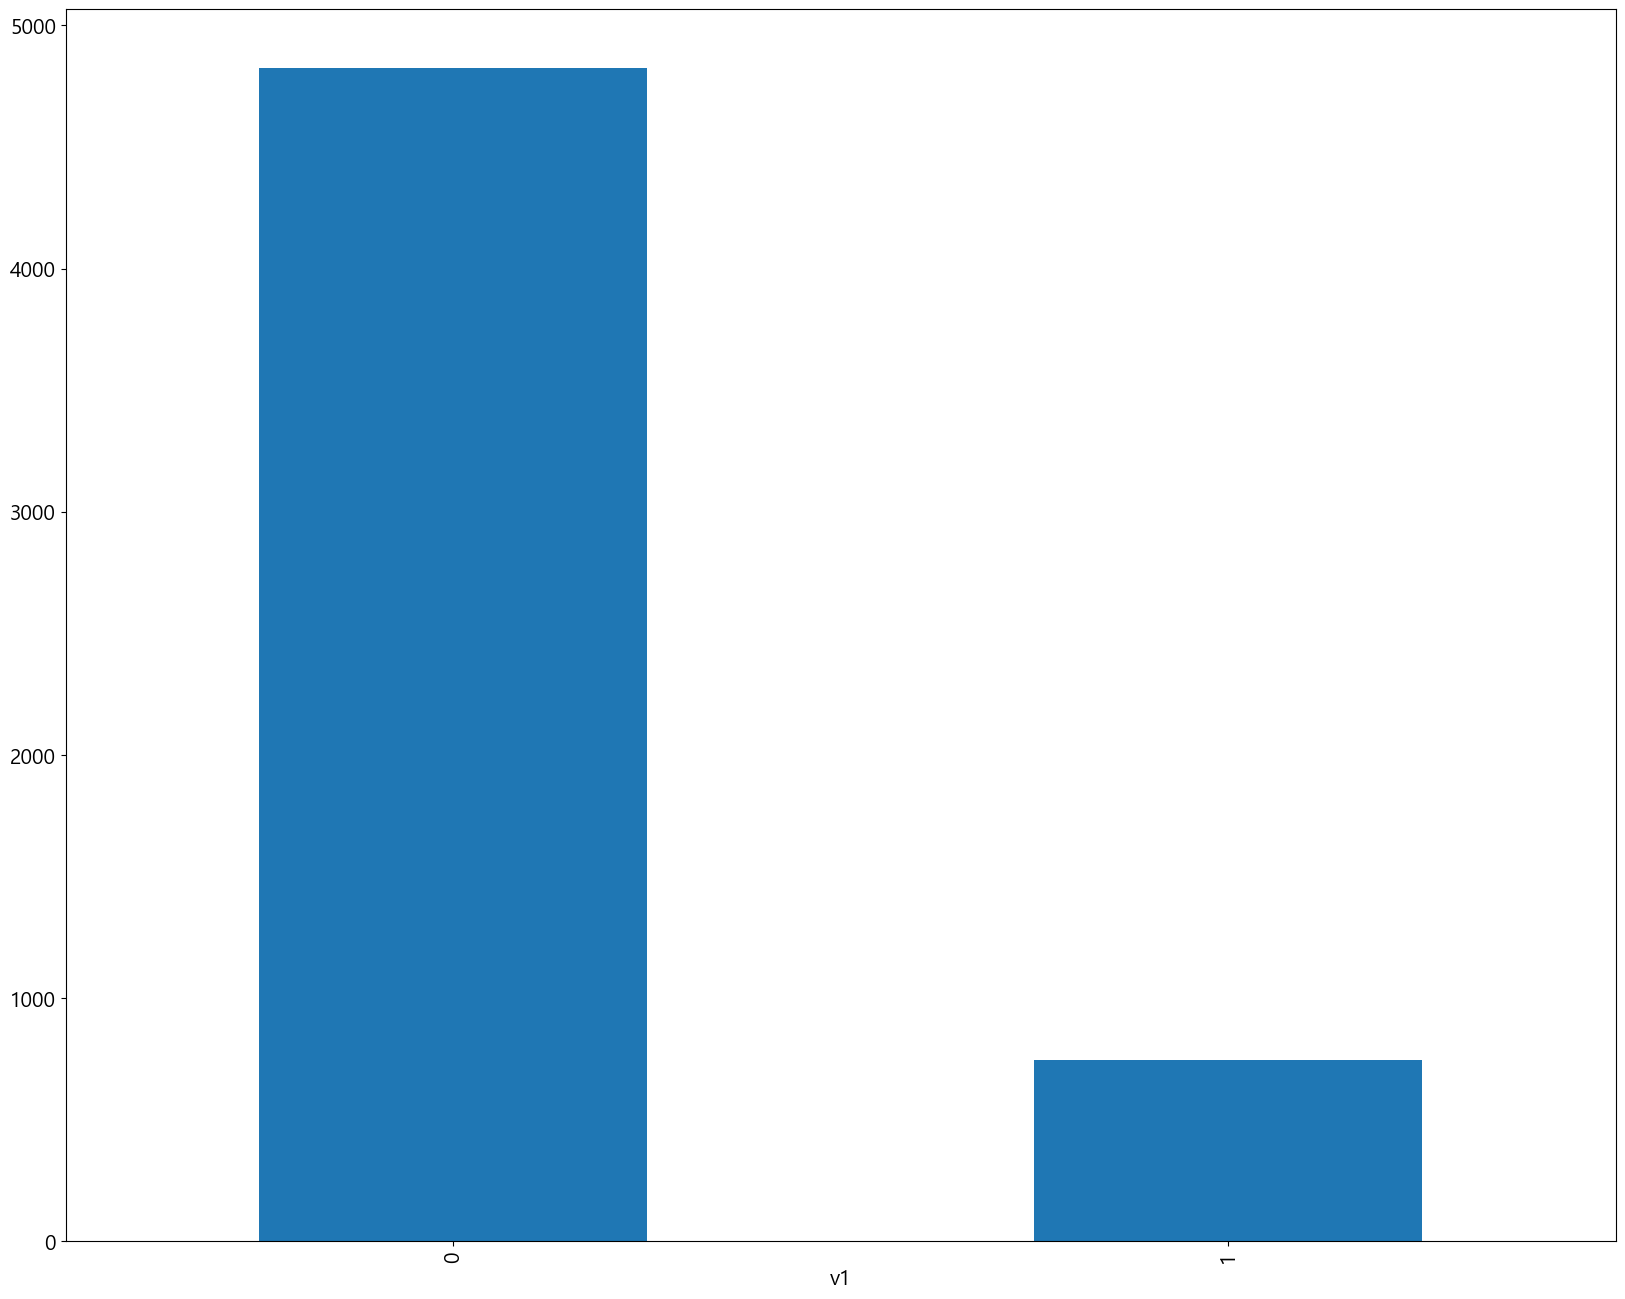

In [117]:
print(df['v1'].value_counts())

df['v1'].value_counts().plot(kind='bar')

In [118]:
X=df[['v2']] #독립변수

y=df['v1'] #종속변수

print(X[:3])

print(y[:3])

                                                  v2
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
0    0
1    0
2    1
Name: v1, dtype: int64


v1
0    747
1    747
Name: count, dtype: int64


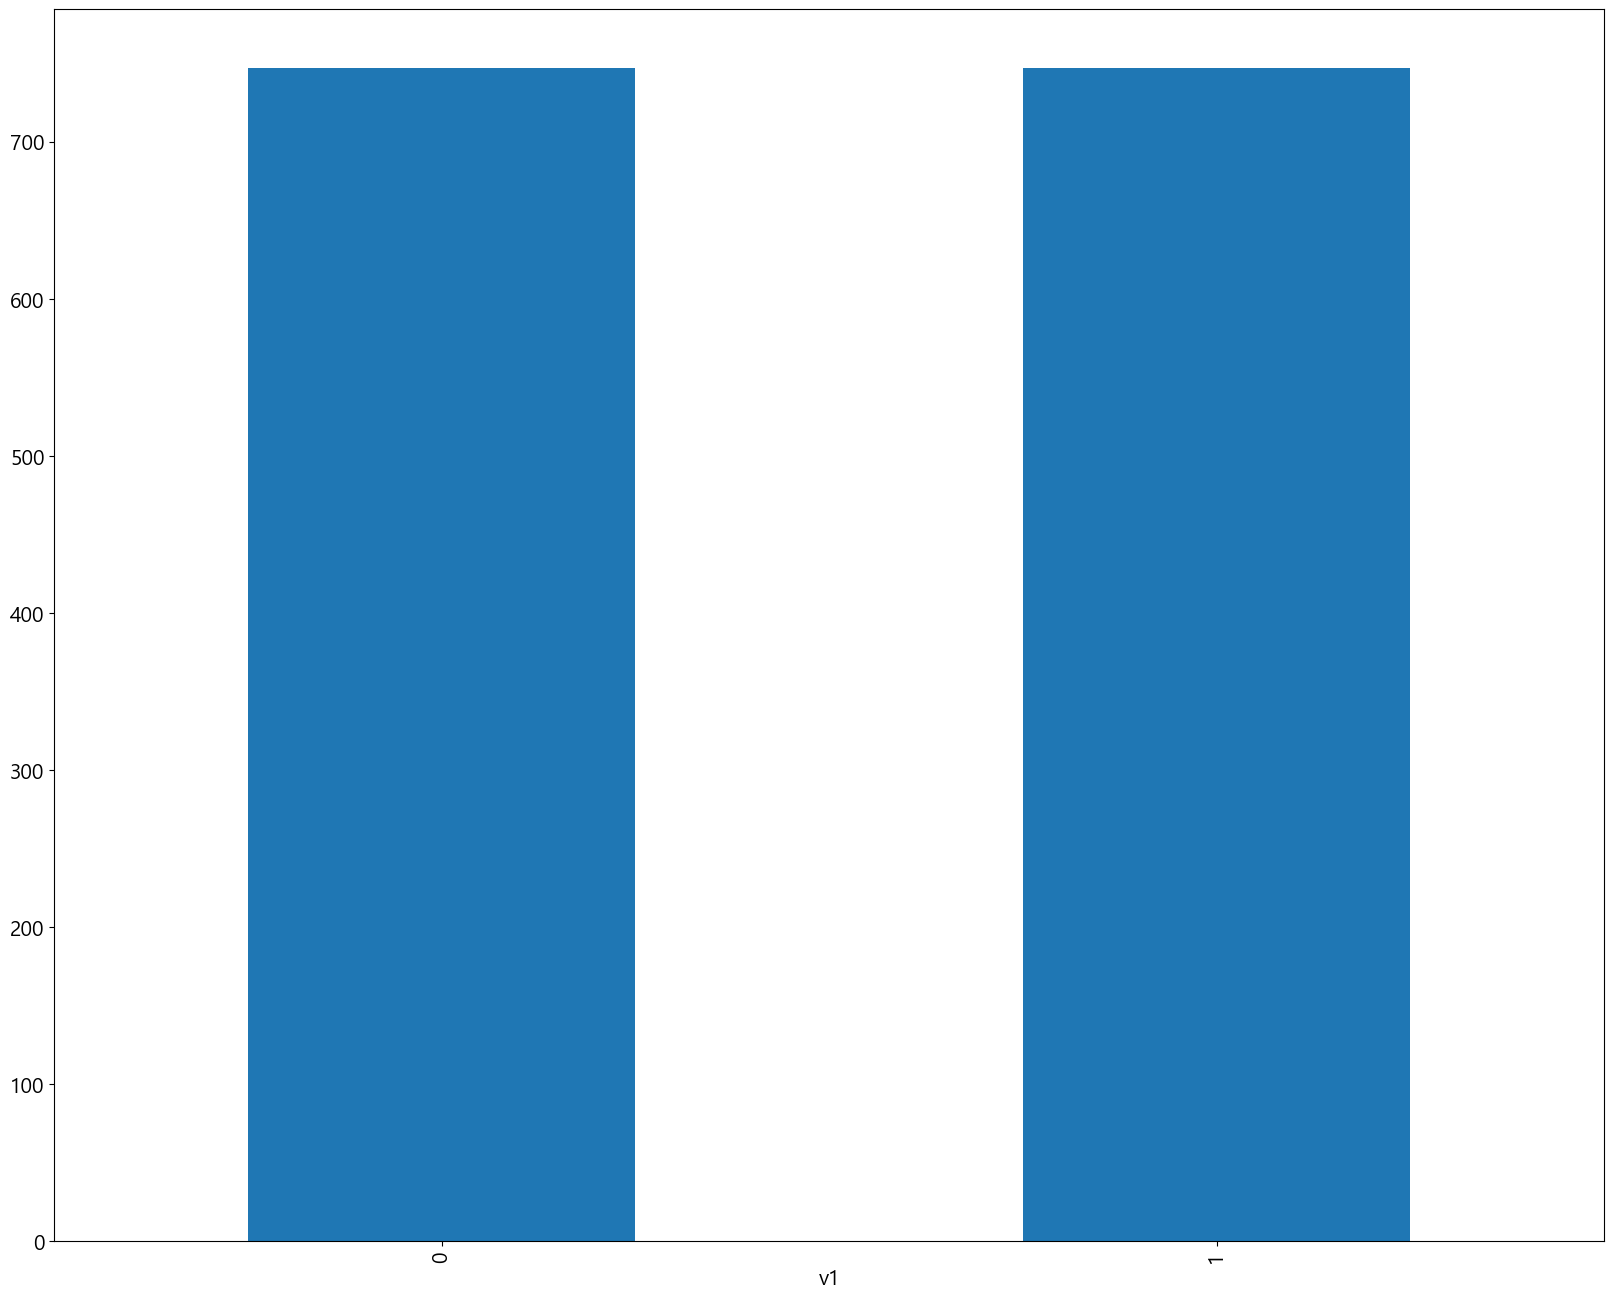

In [119]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=['v2'] )

y_samp = pd.DataFrame(data=y_sample,columns=['v1'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

print(df_samp['v1'].value_counts())

df_samp['v1'].value_counts().plot(kind='bar')

X = df_samp['v2']

y = df_samp['v1']

In [120]:
from tensorflow.keras.preprocessing.text import Tokenizer

#단어 집합을 만들고 단어에 고유한 숫자 인덱스를 부여

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X)

#텍스트를 시퀀스로 변환(단어의 인덱스로만 구성된 새로운 리스트)

sequences = tokenizer.texts_to_sequences(X)

print(sequences[:5])

[[1486, 49, 801, 1487, 18, 336, 87, 26, 2274, 45, 27, 173], [1148, 14, 4, 25, 613], [174, 149, 4, 2, 189, 5, 105, 17, 614, 613], [946, 88, 38, 399, 702, 1, 2275, 1488, 130, 2276, 26, 1489, 242, 45, 702, 1, 2277, 2278, 24, 46, 1149], [7, 291, 1490, 802, 553, 53, 316, 26, 803, 703, 25, 63, 47, 217, 1491, 13, 434, 337, 97]]


In [121]:
#단어와 인덱스 목록

word_to_index = tokenizer.word_index

for idx,word in enumerate(word_to_index):

    print(idx+1,word,end=',')

    if idx>8:
         break

1 to,2 you,3 a,4 call,5 i,6 the,7 u,8 your,9 for,10 is,

메일의 최대 길이 : 77
19.846050870147256


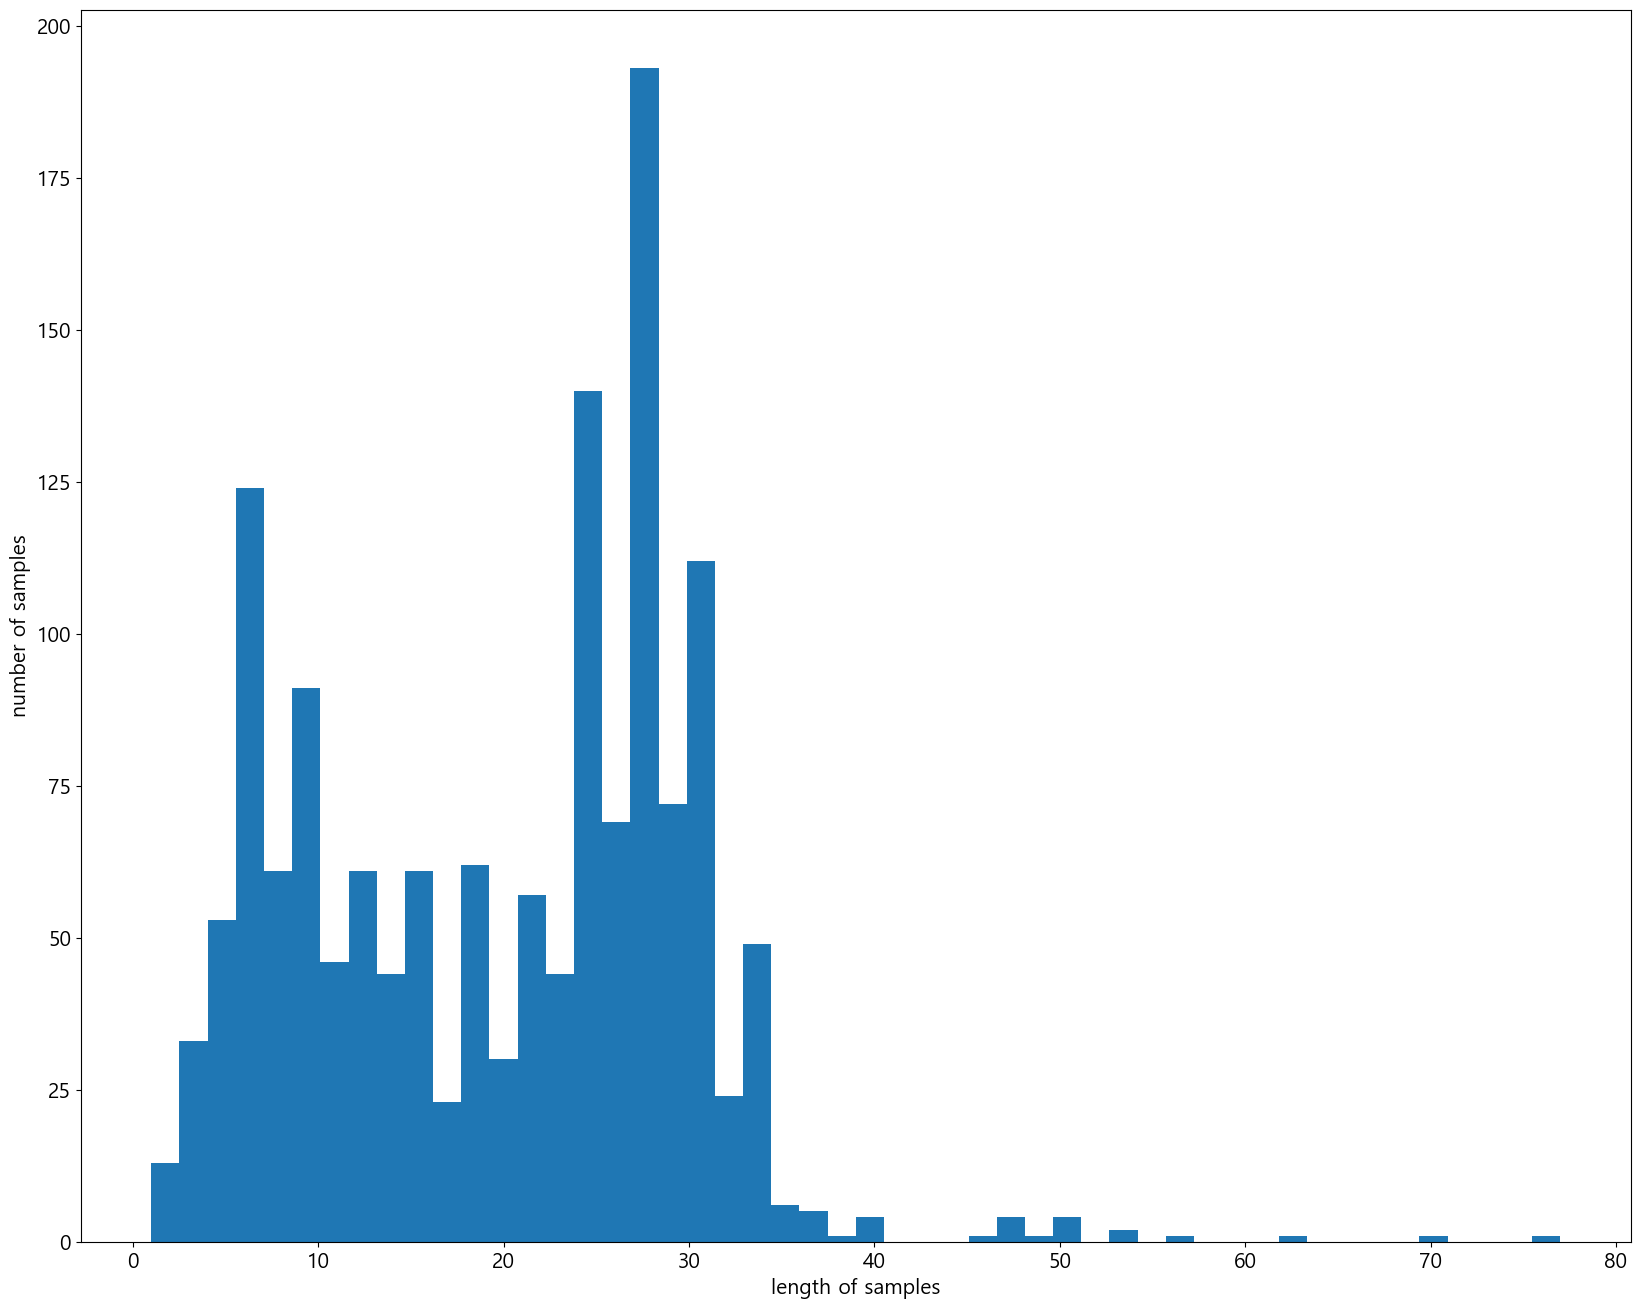

In [122]:
import matplotlib.pyplot as plt

X_data = sequences

print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))

print(sum(map(len, X_data))/len(X_data)) #메일의 평균 길이

plt.hist([len(s) for s in X_data], bins=50)

plt.xlabel('length of samples') # 길이

plt.ylabel('number of samples') # 샘플수

plt.show()

In [123]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#최대 사이즈에 맞추어 빈칸에 0으로 채움

data = pad_sequences(X_data, maxlen = 77)

print("학습용 데이터의 크기(shape): ", data.shape)

print(data[:1])

학습용 데이터의 크기(shape):  (1494, 77)
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 1486   49  801 1487   18
   336   87   26 2274   45   27  173]]


In [124]:
#학습용:검증용 8:2로 구분

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y, random_state=10)

In [128]:
from keras.layers import Embedding, Dense, LSTM

from keras.models import Sequential
model = Sequential()

# Embedding(단어수,출력사이즈,최대단어수)

model.add(Embedding(len(word_to_index)+1, output_dim=(32,)))

model.add(LSTM(32)) # Long Short-Term Memory

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [129]:
hist = model.fit(X_train, y_train.values, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


ValueError: Invalid dtype: tuple

In [ ]:
model.evaluate(X_test, y_test.values, verbose=0)



In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])

plt.plot(hist.history['accuracy'])

plt.plot(hist.history['val_accuracy'])

plt.legend(['loss','val_loss','accuracy','val_accuracy'])

plt.grid()

plt.show()

In [ ]:
model.predict(X_test[:3])

In [1]:
# 한글텍스트 분류

import pandas as pd

train_data = pd.read_csv('c:/data/text/ratings_train.csv',encoding='ms949')

test_data = pd.read_csv('c:/data/text/ratings_test.csv',encoding='ms949')

In [2]:
len(train_data)

150000

In [3]:
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [4]:
len(test_data)

50000

In [5]:
test_data[:3]

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [6]:
# 중복되지 않은 데이터 확인

train_data['document'].nunique(), train_data['label'].nunique()

# 중복값이 약 4000개

(146157, 2)

In [7]:
#중복값 제거

train_data.drop_duplicates(subset=['document'], inplace=True)

len(train_data)

146158

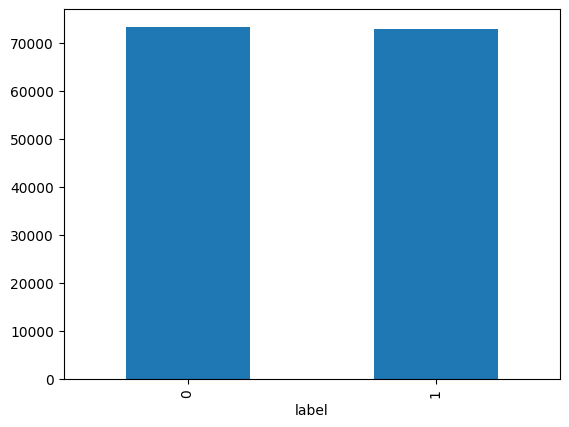

In [8]:
import matplotlib.pyplot as plt

train_data['label'].value_counts().plot(kind = 'bar')
plt.show()

In [9]:
train_data.loc[train_data.document.isnull()]

,document,label
25857,NaN,1


In [10]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거

train_data.isnull().values.any()



False

In [11]:
#특수문자,기호 제거

train_data['document'] = train_data['document'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
                                                        # 한글, 공백 아니면 제거
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [12]:
import numpy as np

#공백 제거

train_data['document'] = train_data['document'].replace('^ +', "")

train_data['document'].replace('', np.nan, inplace=True)

train_data.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_19312\2598870194.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['document'].replace('', np.nan, inplace=True)


document    0
label       0
dtype: int64

In [13]:
train_data.loc[train_data.document.isnull()][:3]

,document,label


In [14]:
#null 샘플 제거

train_data = train_data.dropna(how = 'any')

len(train_data)



146157

In [15]:
# test_data에도 동일한 과정 적용

test_data.drop_duplicates(subset = ['document'], inplace=True)
test_data['document'] = test_data['document'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

test_data['document'] = test_data['document'].replace('^ +', "")

test_data['document'].replace('', np.nan, inplace=True)

test_data = test_data.dropna(how='any')

len(test_data)

C:\Users\user\AppData\Local\Temp\ipykernel_19312\3098600380.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['document'].replace('', np.nan, inplace=True)


49147

In [16]:
# 불용어 사전

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [17]:
from konlpy.tag import Okt

okt = Okt()

X_train = []  

#형태소 분석

#for sentence in train_data['document']:

for sentence in train_data['document'][:10000]:    

    temp_X = okt.morphs(sentence, stem=True) # 토큰화 //형태소 나누기

    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거

    X_train.append(temp_X)

In [18]:
print(X_train[:3])

[['아', '더빙', '..', '진짜', '짜증나다', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [44]:
# 테스트 데이터에 대한 토큰화

X_test = []

#for sentence in test_data['document']:

for sentence in test_data['document'][:10000]:    

    temp_X = okt.morphs(sentence, stem=True)

    temp_X = [word for word in temp_X if not word in stopwords]

    X_test.append(temp_X)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

#print(tokenizer.word_index)

In [21]:
# 출현빈도가 3회 미만인 단어들

threshold = 3

total_cnt = len(tokenizer.word_index) # 단어수

rare_cnt = 0

total_freq = 0

rare_freq = 0

for key, value in tokenizer.word_counts.items():

    total_freq = total_freq + value

    if(value < threshold):

        rare_cnt = rare_cnt + 1

        rare_freq = rare_freq + value

print(total_cnt) #단어집합 크기

print(rare_cnt) #희귀단어수

13345
8891


In [22]:
vocab_size = total_cnt - rare_cnt + 1

print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4455


In [23]:
tokenizer = Tokenizer(vocab_size)

tokenizer.fit_on_texts(X_train) #텍스트를 숫자 시퀀스로 변환

X_train = tokenizer.texts_to_sequences(X_train)

X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
import joblib  

joblib.dump(tokenizer, 'tokenizer.keras') #백업

['tokenizer.keras']

In [25]:
print(X_train[:3])

[[59, 724, 4, 21, 259, 831], [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26], [373, 1613, 3462, 3, 249, 13]]


In [26]:
y_train = np.array(train_data['label'][:10000])

y_test = np.array(test_data['label'][:10000])

In [27]:
max_len=max(len(l) for l in X_train) #리뷰의 최대 길이

max_len

59

In [28]:
cnt = 0

for s in X_train:

  if(len(s) <= 30):

      cnt = cnt + 1

#최대 길이 이하인 샘플의 비율
(cnt / len(X_train))*100

93.58

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_len)

X_test = pad_sequences(X_test, maxlen = max_len)

In [30]:
from tensorflow.keras.layers import Embedding, Dense, LSTM

from tensorflow.keras.models import Sequential

from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Embedding(vocab_size, 100))

model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
#   조기학습종료
mc = ModelCheckpoint('RNN_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# 가장 성능이 좋은 모델
model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.5888 - loss: 0.6693
Epoch 1: val_acc improved from -inf to 0.73250, saving model to RNN_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.5906 - loss: 0.6681 - val_acc: 0.7325 - val_loss: 0.5145
Epoch 2/10
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.8012 - loss: 0.4377
Epoch 2: val_acc improved from 0.73250 to 0.80250, saving model to RNN_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.8012 - loss: 0.4375 - val_acc: 0.8025 - val_loss: 0.4248
Epoch 3/10
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.8288 - loss: 0.4066
Epoch 3: val_acc did not improve from 0.80250
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.8287 - loss: 0.4068 - val_acc: 0.7805 - val_loss: 0.4653
Epoch 4/10
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.8622 - loss: 0.3188
Epoch 4: val_acc improved from 0.80250 to 0.80750, saving model to RNN_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.8623 

In [32]:
loaded_model = load_model('RNN_model.keras')

loaded_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8074 - loss: 0.4800


[0.48001864552497864, 0.8055999875068665]

In [33]:
def review_predict(new_sentence):

  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화

  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩

  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩

  score = float(model.predict(pad_new)) # 예측

  if(score > 0.5):

    print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")

  else:

    print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [46]:
review_predict('추천합니다 재밌어요')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
95.95% 확률로 긍정 리뷰입니다.



C:\Users\user\AppData\Local\Temp\ipykernel_19312\4169707786.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [34]:
review_predict('연기는 잔잔하게 볼 만 합니다')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
97.29% 확률로 긍정 리뷰입니다.



C:\Users\user\AppData\Local\Temp\ipykernel_19312\4169707786.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [35]:
review_predict('영화의 주제가 뭔지 모르겠음')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
93.82% 확률로 부정 리뷰입니다.



C:\Users\user\AppData\Local\Temp\ipykernel_19312\4169707786.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [36]:
review_predict('익살스런 연기가 돋보였던 영화')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
93.67% 확률로 긍정 리뷰입니다.



C:\Users\user\AppData\Local\Temp\ipykernel_19312\4169707786.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [37]:
review_predict('기대보다는 스토리가 큰 감흥은 없습니다')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
99.56% 확률로 부정 리뷰입니다.



C:\Users\user\AppData\Local\Temp\ipykernel_19312\4169707786.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [1]:
# 문장만들기

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:

    try:

        for gpu in gpus:

            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:

        print(e)

In [2]:
import pandas as pd

df=pd.read_csv('c:/data/text/ratings_all.csv',encoding='ms949')

df=df[df['label'] == 1]

df=df.sample(frac=1) # fraction 샘플링 비율 

df

,document,label
179350,80년대 치고는 최우수작품인듯,1
154749,음악과 인간과 그 시대상이 모두 적절히 어우러진 감동적인 영화였어요 :),1
12470,3도 반전 좋았제 ^^,1
161160,이거 재밌는데...,1
73929,"영화, 그 이상의 가치.",1
...,...,...
150022,꽤 재밌게 본 영화였다!,1
155853,너무너무 재밋어요!!,1
172688,여배우가 아름답다.,1
178652,진짜 최고다,1


In [3]:
text='\n'.join(map(str,df['document'].values[11000:13000]))

text[:100]

'이거 1년짜리 아니었어요? 연장해서 10부작이라니..헐~ 짧다!ㅠㅠ\n김재원짱! 장애인의 대한 시선도 달라지는것 같은 따뜻한 드라마\n노튼의 마지막 사이코 연기는 아직도 소름이 돋는다'

In [4]:
len(text)

72273

In [5]:
#정수 인코딩, 단어에 번호
from tensorflow.keras.preprocessing.text import Tokenizer

t=Tokenizer()

t.fit_on_texts([text])

vocab_size=len(t.word_index)+1

print(vocab_size) #단어 집합 사이즈

9280


In [6]:
t.word_index

{'영화': 1,
 '정말': 2,
 '너무': 3,
 '진짜': 4,
 '이': 5,
 '더': 6,
 '최고의': 7,
 '잘': 8,
 '최고': 9,
 '영화를': 10,
 '수': 11,
 '왜': 12,
 '그': 13,
 '드라마': 14,
 '보고': 15,
 'ㅋㅋ': 16,
 '이런': 17,
 '영화는': 18,
 '다': 19,
 '봤는데': 20,
 '좋은': 21,
 '다시': 22,
 '난': 23,
 '참': 24,
 'ㅋ': 25,
 '내': 26,
 '영화다': 27,
 '본': 28,
 '것': 29,
 '있는': 30,
 '내가': 31,
 '재밌게': 32,
 '평점이': 33,
 '그리고': 34,
 '그냥': 35,
 '또': 36,
 '좀': 37,
 'ㅠㅠ': 38,
 '연기': 39,
 '하는': 40,
 '많이': 41,
 '영화가': 42,
 'ㅠ': 43,
 'ㅋㅋㅋ': 44,
 '굿': 45,
 'ㅎㅎ': 46,
 '역시': 47,
 '마지막': 48,
 '아직도': 49,
 '있다': 50,
 '좋다': 51,
 '이렇게': 52,
 '가장': 53,
 '이거': 54,
 '10점': 55,
 '보는': 56,
 '작품': 57,
 '와': 58,
 '액션': 59,
 '봤다': 60,
 '영화입니다': 61,
 '꼭': 62,
 '멋진': 63,
 '하지만': 64,
 '재미있게': 65,
 '말이': 66,
 '감동': 67,
 '그래도': 68,
 '재밌다': 69,
 '한': 70,
 '없는': 71,
 '평점': 72,
 '아름다운': 73,
 '최고다': 74,
 '지금': 75,
 '보면': 76,
 '같은': 77,
 '봤습니다': 78,
 '봤던': 79,
 '모두': 80,
 '제일': 81,
 '같다': 82,
 '보니': 83,
 '아': 84,
 '스토리': 85,
 '여운이': 86,
 '넘': 87,
 '않는': 88,
 '특히': 89,
 '없다': 90,
 '대한': 91,


In [7]:
sequences=list()

for line in text.split('\n'): #문장 나누기

    encoded=t.texts_to_sequences([line])[0] #단어를 숫자로 변환

    for i in range(1,len(encoded)):

        sequence=encoded[:i+1]

        sequences.append(sequence)

print(len(sequences))   

13637


In [8]:
sequences

[[54, 1658],
 [54, 1658, 1659],
 [54, 1658, 1659, 1660],
 [54, 1658, 1659, 1660, 1661],
 [54, 1658, 1659, 1660, 1661, 803],
 [54, 1658, 1659, 1660, 1661, 803, 1662],
 [54, 1658, 1659, 1660, 1661, 803, 1662, 38],
 [1663, 1664],
 [1663, 1664, 91],
 [1663, 1664, 91, 1665],
 [1663, 1664, 91, 1665, 1666],
 [1663, 1664, 91, 1665, 1666, 77],
 [1663, 1664, 91, 1665, 1666, 77, 224],
 [1663, 1664, 91, 1665, 1666, 77, 224, 14],
 [1667, 48],
 [1667, 48, 1668],
 [1667, 48, 1668, 186],
 [1667, 48, 1668, 186, 49],
 [1667, 48, 1668, 186, 49, 374],
 [1667, 48, 1668, 186, 49, 374, 1669],
 [1670, 1671],
 [1670, 1671, 1672],
 [1670, 1671, 1672, 1673],
 [1670, 1671, 1672, 1673, 1674],
 [1670, 1671, 1672, 1673, 1674, 83],
 [1670, 1671, 1672, 1673, 1674, 83, 31],
 [1670, 1671, 1672, 1673, 1674, 83, 31, 6],
 [1670, 1671, 1672, 1673, 1674, 83, 31, 6, 41],
 [1670, 1671, 1672, 1673, 1674, 83, 31, 6, 41, 1675],
 [1670, 1671, 1672, 1673, 1674, 83, 31, 6, 41, 1675, 528],
 [1670, 1671, 1672, 1673, 1674, 83, 31, 6, 4

In [9]:
max_len=max(len(l) for l in sequences)

print(max_len) #문장의 최대 길이

38


In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences=pad_sequences(sequences,maxlen=max_len,padding='pre')

sequences #제로패딩

array([[   0,    0,    0, ...,    0,   54, 1658],
       [   0,    0,    0, ...,   54, 1658, 1659],
       [   0,    0,    0, ..., 1658, 1659, 1660],
       ...,
       [   0,    0,    0, ...,  628, 9278, 9279],
       [   0,    0,    0, ..., 9278, 9279, 1534],
       [   0,    0,    0, ..., 9279, 1534,  744]])

In [11]:
import numpy as np

sequences=np.array(sequences)

X=sequences[:, :-1]

y=sequences[:,-1]

In [12]:
from tensorflow.python.keras.utils import np_utils

#원핫인코딩

y=np_utils.to_categorical(y,num_classes=vocab_size) #vocab_size 단어수

y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.models import Sequential

from keras.layers import Dense,Embedding,LSTM

from keras.layers import Embedding

from keras.optimizers import Adam

model=Sequential()

model.add(Embedding(vocab_size,500,input_shape=(max_len-1,))) #단어수,벡터사이즈,입력사이즈

model.add(LSTM(128))

model.add(Dense(vocab_size,activation='softmax'))

adam = Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 37, 500)        │     4,640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       322,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9280)           │     1,197,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,159,168 (23.50 MB)

 Trainable params: 6,159,168 (23.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#메모리 부족으로 학습이 실패함

#model.fit(X,y,epochs=20)

In [14]:
import os

import glob

[os.remove(f) for f in glob.glob('*.keras')]

[None]

In [15]:
import time

from keras.models import load_model

x_size=len(X)

n=800

for i in range(0,x_size,n):

    print('step ',int(i/n)+1,'/',int(x_size/n))

    X1=X[i:min(i + n, x_size)]

    y1=y[i:min(i + n, x_size)]    

    model.fit(X1,y1,batch_size=64,epochs=30, verbose=1)

    model.save(f'sentence{int(i/n)}.keras')    

    tf.keras.backend.clear_session()

    del model    

    time.sleep(2)

    model = load_model(f'sentence{int(i/n)}.keras')

step  1 / 17
Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.0099 - loss: 9.0831
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.0087 - loss: 7.2481
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0082 - loss: 6.4641
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.0132 - loss: 6.1148
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0259 - loss: 5.5566
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0456 - loss: 4.9018
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2106 - loss: 4.0418
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4069 - loss: 3.2600
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6359 - loss: 2.4743
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8060 - loss: 1.7222
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8790 - loss: 1.1070
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/ste

KeyboardInterrupt: 

In [16]:
def sequence_generation(model,t,current_word,n):

    init_word=current_word

    sentence=''

    for _ in range(n):

        encoded=t.texts_to_sequences([current_word])[0]

        encoded=pad_sequences([encoded],maxlen=max_len-1,padding='pre')
        pred=model.predict(encoded,verbose=0)

        result=np.argmax(pred,axis=1)

        for word,index in t.word_index.items():

            if index==result:

                break

        current_word=current_word+' '+word

        sentence=sentence +' '+word

        

    sentence=init_word+sentence

    return sentence

In [17]:
print(sequence_generation(model,t,'너무',5))

print(sequence_generation(model,t,'진짜',5))

print(sequence_generation(model,t,'역시',5))

print(sequence_generation(model,t,'완전',5))

print(sequence_generation(model,t,'왜케',5))

print(sequence_generation(model,t,'오랜만에',5))

print(sequence_generation(model,t,'큰',5))

print(sequence_generation(model,t,'낭만적',5))

print(sequence_generation(model,t,'정말',5))

너무 좋은 영화 힐링도 되고 그냥
진짜 잘만든 애니 최고다 진짜 최고
역시 영화계의 조상이자 최고봉 이 영화를
완전 알았다 미국내 인종차별 문제를 쿨하게
왜케 다른사람들이재미없다고하네요 단순히90년대의감성만을자극하는복고물이아니라사랑가족애우정등을모두아루르는걸작 감칠맛나는사투리연기를보여준배우들과주옥같은대사를써준작가그리고케이블에서최고의드라마를만들어낸pd까지모두대단하다 응칠내가니억수로사랑하는거알제 너만
오랜만에 아쉬운 영화 현실적인 경고 감상
큰 위해 사는가 인생같은영화 단순히90년대의감성만을자극하는복고물이아니라사랑가족애우정등을모두아루르는걸작 감칠맛나는사투리연기를보여준배우들과주옥같은대사를써준작가그리고케이블에서최고의드라마를만들어낸pd까지모두대단하다
낭만적 위해 사는가 인생같은영화 화이팅 완전사랑해용♡
정말 대단한 배우다 다른사람들이재미없다고하네요 모르겟다만 화이팅


In [2]:
# 텍스트마이닝 실습(CNN)

import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  

print(gpus)  

if gpus:  
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
            print(e)

[]


In [3]:
import pandas as pd

train_data = pd.read_csv('c:/data/text/ratings_train.csv',encoding='ms949')

test_data = pd.read_csv('c:/data/text/ratings_test.csv',encoding='ms949')

In [4]:
len(train_data)

150000

In [5]:
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [6]:
len(test_data)

50000

In [7]:
test_data[:3]

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [8]:
# 중복되지 않은 데이터 확인

train_data['document'].nunique(), train_data['label'].nunique()

# 중복값이 약 4000개

(146157, 2)

In [9]:
#중복값 제거

train_data.drop_duplicates(subset=['document'], inplace=True)
len(train_data)

146158

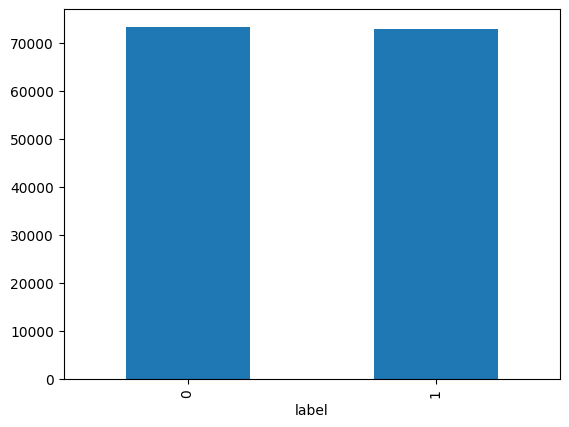

In [10]:
import matplotlib.pyplot as plt

train_data['label'].value_counts().plot(kind = 'bar')

plt.show()

In [11]:
train_data.loc[train_data.document.isnull()]

,document,label
25857,NaN,1


In [12]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거

train_data.isnull().values.any()

False

In [13]:
#특수문자,기호 제거

train_data['document'] = train_data['document'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [14]:
import numpy as np

#공백 제거

train_data['document'] = train_data['document'].replace('^ +', "")

train_data['document'].replace('', np.nan, inplace=True)

train_data.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_7852\2598870194.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['document'].replace('', np.nan, inplace=True)


document    0
label       0
dtype: int64

In [15]:
train_data.loc[train_data.document.isnull()][:3]

,document,label


In [16]:
#null 샘플 제거

train_data = train_data.dropna(how = 'any')

len(train_data)

146157

In [17]:
# test_data에도 동일한 과정 적용

test_data.drop_duplicates(subset = ['document'], inplace=True)

test_data['document'] = test_data['document'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

test_data['document'] = test_data['document'].replace('^ +', "")

test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

len(test_data)

C:\Users\user\AppData\Local\Temp\ipykernel_7852\3790929478.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['document'].replace('', np.nan, inplace=True)


49147

In [18]:
# 불용어 사전

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [19]:
from konlpy.tag import Okt

okt = Okt()

X_train = []  

#형태소 분석

#for sentence in train_data['document']:

for sentence in train_data['document'][:10000]:    

    temp_X = okt.morphs(sentence, stem=True) # 토큰화

    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거

    X_train.append(temp_X)

In [20]:
print(X_train[:3])

[['아', '더빙', '..', '진짜', '짜증나다', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [21]:
# 테스트 데이터에 대한 토큰화

X_test = []

#for sentence in test_data['document']:

for sentence in test_data['document'][:10000]:    

    temp_X = okt.morphs(sentence, stem=True)

    temp_X = [word for word in temp_X if not word in stopwords]

    X_test.append(temp_X)

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

#print(tokenizer.word_index)

In [23]:
# 출현빈도가 3회 미만인 단어들

threshold = 3

total_cnt = len(tokenizer.word_index) # 단어수

rare_cnt = 0

total_freq = 0

rare_freq = 0

for key, value in tokenizer.word_counts.items():

    total_freq = total_freq + value

    if(value < threshold):

        rare_cnt = rare_cnt + 1

        rare_freq = rare_freq + value

print(total_cnt) #단어집합 크기

print(rare_cnt) #희귀단어수

13345
8891


In [24]:
vocab_size = total_cnt - rare_cnt + 1

print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4455


In [25]:
tokenizer = Tokenizer(vocab_size)

tokenizer.fit_on_texts(X_train) #텍스트를 숫자 시퀀스로 변환

X_train = tokenizer.texts_to_sequences(X_train)

X_test = tokenizer.texts_to_sequences(X_test)

In [26]:
print(X_train[:3])

[[59, 724, 4, 21, 259, 831], [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26], [373, 1613, 3462, 3, 249, 13]]


In [27]:
y_train = np.array(train_data['label'][:10000])

y_test = np.array(test_data['label'][:10000])

In [28]:
max_len=max(len(l) for l in X_train) #리뷰의 최대 길이

In [29]:
cnt = 0
for s in X_train:

  if(len(s) <= 30):

      cnt = cnt + 1

#최대 길이 이하인 샘플의 비율

(cnt / len(X_train))*100


93.58

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_len)

X_test = pad_sequences(X_test, maxlen = max_len)

In [31]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, Conv1D, Dense, Flatten, MaxPooling1D

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import load_model

model = Sequential()

model.add(Embedding(vocab_size, 100, input_shape = (max_len,)))

model.add(Conv1D(filters = 64, kernel_size = 5, padding = 'same',activation = 'relu', strides = 1))

model.add(Conv1D(filters = 32, kernel_size = 4, padding = 'same',activation = 'relu', strides = 1))

model.add(Conv1D(filters = 16, kernel_size = 3, padding = 'same',activation = 'relu', strides = 1))

model.add(MaxPooling1D(5))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['acc'])

c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

mc = ModelCheckpoint('CNN_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5446 - loss: 0.6744
Epoch 1: val_acc improved from -inf to 0.77550, saving model to CNN_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.5468 - loss: 0.6729 - val_acc: 0.7755 - val_loss: 0.4624
Epoch 2/10
113/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8548 - loss: 0.3371
Epoch 2: val_acc improved from 0.77550 to 0.79200, saving model to CNN_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8546 - loss: 0.3378 - val_acc: 0.7920 - val_loss: 0.4404
Epoch 3/10
120/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9188 - loss: 0.2138
Epoch 3: val_acc improved from 0.79200 to 0.79900, saving model to CNN_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9183 - loss: 0.2144 - val_acc: 0.7990 - val_loss: 0.4932
Epoch 4/10
114/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9482 - loss: 0.1446
Epoch 4: val_acc did not improve from 0.79900
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9480 - loss: 

In [33]:
loaded_model = load_model('CNN_model.keras')

loaded_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7995 - loss: 0.4914


[0.5006910562515259, 0.7972999811172485]

In [34]:
def review_predict(new_sentence):

  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화

  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩

  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩

  score = float(model.predict(pad_new)) # 예측

  if(score > 0.5):

    print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")

  else:

    print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [35]:
review_predict('연기는 잔잔하게 볼 만 합니다')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
79.60% 확률로 긍정 리뷰입니다.



C:\Users\user\AppData\Local\Temp\ipykernel_7852\4169707786.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [36]:
review_predict('영화의 주제가 뭔지 모르겠음')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
99.56% 확률로 부정 리뷰입니다.



C:\Users\user\AppData\Local\Temp\ipykernel_7852\4169707786.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [37]:
review_predict('익살스런 연기가 돋보였던 영화')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
99.18% 확률로 긍정 리뷰입니다.



C:\Users\user\AppData\Local\Temp\ipykernel_7852\4169707786.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [38]:
review_predict('기대보다는 스토리가 큰 감흥은 없습니다')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
99.95% 확률로 부정 리뷰입니다.



C:\Users\user\AppData\Local\Temp\ipykernel_7852\4169707786.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측
